In [4]:
import os
import holidays 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_ta as ta
import numpy as np



In [5]:
pip install missingn

ERROR: Could not find a version that satisfies the requirement missingn (from versions: none)
ERROR: No matching distribution found for missingn
Note: you may need to restart the kernel to use updated packages.


In [6]:

import missingno as msno
from statsmodels.tsa.stattools import adfuller

ModuleNotFoundError: No module named 'missingno'

In [7]:

data = '2012-12-30'

path_stock = "../data/stock"
path_fed = "../data/fed"

# Top 10 Tech Companies based on Market Cap

In [8]:
AAPL_df = pd.read_csv(f"{path_stock}/AAPL_stock.csv")
MSFT_df = pd.read_csv(f"{path_stock}/MSFT_stock.csv")
GOOGL_df = pd.read_csv(f"{path_stock}/GOOGL_stock.csv")
NVDA_df = pd.read_csv(f"{path_stock}/NVDA_stock.csv")
AMZN_df = pd.read_csv(f"{path_stock}/AMZN_stock.csv")
META_df = pd.read_csv(f"{path_stock}/META_stock.csv")
TSLA_df = pd.read_csv(f"{path_stock}/TSLA_stock.csv")
AVGO_df = pd.read_csv(f"{path_stock}/AVGO_stock.csv")
AMD_df = pd.read_csv(f"{path_stock}/AMD_stock.csv")
CRM_df = pd.read_csv(f"{path_stock}/CRM_stock.csv")

## Tach companies stock Data Frame processing
- Remove the null / header
- Make some features Engineering
- Change the column name
- Change the time type

In [9]:
import pandas as pd

def process_stock_data(df, ticker_symbol):
    """
    Processes a stock data DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with stock data (Price, Close, High, Low, Open, Volume, Ticker).
        ticker_symbol (str): Stock ticker symbol (e.g., 'AAPL').

    Returns:
        pd.DataFrame: Processed DataFrame with calculated features and renamed columns.
    """
    df.dropna(inplace=True)  # Remove rows containing any missing values.

    columns_to_convert = ['Close', 'High', 'Low', 'Open', 'Volume']
    df[columns_to_convert] = df[columns_to_convert].astype(float)  # Convert specified price/volume columns to floating-point numbers.

    # Calculate new features based on price data:
    df["delta_price"] = df["High"] - df["Low"]  # Calculate the difference between the high and low price for each day.
    df["avg_price"] = (df["Close"] + df["High"] + df["Low"] + df["Open"]) / 4  # Calculate the average of the close, high, low, and open prices.
    df["price_ratio"] = df["delta_price"] / df["avg_price"]  # Calculate the ratio of the delta price to the average price.
    df["invest"] = df["Volume"] * df["avg_price"]  # Calculate the difference between the trading volume and the average price (note: this might not be a standard financial metric and could be re-evaluated).

    # Rename the columns for clarity and to include the ticker symbol:
    df.rename(columns={"Price": "date",  # Rename the 'Price' column to 'date'.
                        "Close": f"close_{ticker_symbol}",  # Rename 'Close' to 'cl_ticker'.
                        "High": f"high_{ticker_symbol}",  # Rename 'High' to 'hi_ticker'.
                        "Low": f"low_{ticker_symbol}",  # Rename 'Low' to 'lo_ticker'.
                        "Open": f"open_{ticker_symbol}",  # Rename 'Open' to 'op_ticker'.
                        "delta_price": f"delta_price_{ticker_symbol}",  # Rename 'delta_price' to 'de_ticker'.
                        "avg_price": f"avg_price_{ticker_symbol}",  # Rename 'avg_price' to 'av_ticker'.
                        "invest": f"invest_{ticker_symbol}",  # Rename 'invest' to 'va_ticker'.
                        "price_ratio": f"price_ratio_{ticker_symbol}",  # Rename 'ratio' to 'ra_ticker'.
                        'Volume': f'volume_{ticker_symbol}'}, inplace=True)  # Rename 'Volume' to 'Vo_ticker'.

    df['date'] = pd.to_datetime(df['date'])  # Convert the 'date' column to datetime objects for proper time series handling.

    df.reset_index(drop=True, inplace=True)  # Reset the DataFrame's index to a default integer index and drop the original index.

    # Drop the 'Ticker' column as the ticker information is now embedded in the column names:
    if 'Ticker' in df.columns:
        df.drop('Ticker', axis=1, inplace=True)

    return df  # Return the processed DataFrame.

### Tech companies stock clean Data Frame 

In [10]:
AAPL_clean_df = process_stock_data(AAPL_df, 'AAPL')
MSFT_clean_df = process_stock_data(MSFT_df, 'MSFT')
GOOGL_clean_df = process_stock_data(GOOGL_df, 'GOOGL')
NVDA_clean_df = process_stock_data(NVDA_df, 'NVDA')
AMZN_clean_df = process_stock_data(AMZN_df, 'AMZN')
META_clean_df = process_stock_data(META_df, 'META')
TSLA_clean_df = process_stock_data(TSLA_df, 'TSLA')
AVGO_clean_df = process_stock_data(AVGO_df, 'AVGO')
AMD_clean_df = process_stock_data(AMD_df, 'AMD')
CRM_clean_df = process_stock_data(CRM_df, 'CRM')

###  Find the Max and Min od Data column in each companies stock Data Frame

In [11]:
stock_data_ranges = {}

dataframes = {
    "AAPL": AAPL_clean_df,
    "MSFT": MSFT_clean_df,
    "GOOGL": GOOGL_clean_df,
    "NVDA": NVDA_clean_df,
    "AMZN": AMZN_clean_df,
    "META": META_clean_df,
    "TSLA": TSLA_clean_df,
    "AVGO": AVGO_clean_df,
    "AMD": AMD_clean_df,
    "CRM": CRM_clean_df,
}

for name, df in dataframes.items():
    if 'date' in df.columns:
        min_date = df['date'].min()
        max_date = df['date'].max()
        stock_data_ranges[name] = {'min_date': min_date, 'max_date': max_date}
    else:
        print(f"Warning: 'date' column not found in {name}_clean_df")

# Create a Pandas DataFrame to display the results
date_range_df = pd.DataFrame.from_dict(stock_data_ranges, orient='index')
date_range_df.index.name = 'Stock'

print(date_range_df)

        min_date   max_date
Stock                      
AAPL  2000-01-03 2025-04-21
MSFT  2000-01-03 2025-04-21
GOOGL 2004-08-19 2025-04-21
NVDA  2000-01-03 2025-04-21
AMZN  2000-01-03 2025-04-21
META  2012-05-18 2025-04-21
TSLA  2010-06-29 2025-04-21
AVGO  2009-08-06 2025-04-21
AMD   2000-01-03 2025-04-21
CRM   2004-06-23 2025-04-21


In above result , It seems that the META is started from 2012 while almost the others started from 2000.

## Macro Indicators from Yahoo Finance:
- Indices
- Commodities
- Sector ETFs (Proxies)
- Other Market Metrics

In [12]:
macro_df = pd.read_csv(f"{path_stock}/macro_indicators_full.csv")
# Convert the 'date' column to datetime objects
macro_df['Date'] = pd.to_datetime(macro_df['Date'])
macro_df.rename(columns={"Date": "date"}, inplace=True)

In [13]:
macro_df.isnull().sum()

date                            0
S&P500_Index                    0
Dow_Jones_Index                 0
NASDAQ_Composite                0
Russell2000_Index               0
VIX_Index                       0
Dollar_Index_DXY                2
Gold_Futures                  186
WTI_Oil_Futures               177
Copper_Futures                185
Brent_Crude_Futures          1957
Tech_Sector_ETF                 0
Energy_Sector_ETF               0
Financial_Sector_ETF            0
ConsumerDiscretionary_ETF       0
Lithium_ETF                  2654
Semiconductor_ETF             106
Electricity_Proxy               0
dtype: int64

Data Frame : macro_df ---> Has some missing values that need to be check according to the time. 

Let Filter the time after the '2012-05-31'. This is exactly after the time which we have the META stock data frame. 

In [14]:
macro_df_filter = macro_df[macro_df['date'] > data ]
min_date_macro_df_filter = macro_df_filter['date'].min()
max_date_macro_df_filter = macro_df_filter['date'].max()
macro_df_filter.isnull().sum()

date                          0
S&P500_Index                  0
Dow_Jones_Index               0
NASDAQ_Composite              0
Russell2000_Index             0
VIX_Index                     0
Dollar_Index_DXY              2
Gold_Futures                  3
WTI_Oil_Futures               2
Copper_Futures                3
Brent_Crude_Futures          13
Tech_Sector_ETF               0
Energy_Sector_ETF             0
Financial_Sector_ETF          0
ConsumerDiscretionary_ETF     0
Lithium_ETF                   0
Semiconductor_ETF             0
Electricity_Proxy             0
dtype: int64

In [ ]:
#macro_df_filter = macro_df_filter.drop('Brent_Crude_Futures',axis=1)

In [ ]:
pip install missingn

ERROR: Could not find a version that satisfies the requirement missingn (from versions: none)
ERROR: No matching distribution found for missingn
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import missingno as msno
from statsmodels.tsa.stattools import adfuller

ModuleNotFoundError: No module named 'missingno'

In [15]:
df = macro_df_filter
data_name = 'macro_df_filter'
# 1. Matrix Plot: Visualize the pattern of missingness
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title(f'Missing Value Matrix - {data_name}')
plt.show()

NameError: name 'msno' is not defined

<Figure size 1000x600 with 0 Axes>

In [16]:
macro_clean_df = macro_df_filter.dropna()
macro_clean_df.isnull().sum()

date                         0
S&P500_Index                 0
Dow_Jones_Index              0
NASDAQ_Composite             0
Russell2000_Index            0
VIX_Index                    0
Dollar_Index_DXY             0
Gold_Futures                 0
WTI_Oil_Futures              0
Copper_Futures               0
Brent_Crude_Futures          0
Tech_Sector_ETF              0
Energy_Sector_ETF            0
Financial_Sector_ETF         0
ConsumerDiscretionary_ETF    0
Lithium_ETF                  0
Semiconductor_ETF            0
Electricity_Proxy            0
dtype: int64

# Fed Data frame

In [17]:
fed_df = pd.read_csv(f"{path_fed}/combined_economic_indicators.csv")

# Rename the 'Unnamed: 0' column to 'date'
fed_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Convert the 'date' column to datetime objects
fed_df['date'] = pd.to_datetime(fed_df['date'])

In [18]:
fed_df.isnull().sum()

date                       0
cpi                        0
fed_rate                   0
vix                       33
oil                       47
gdp                      101
nonfarm_payrolls           0
treasury_yield            24
industrial_production      0
retail_sales               0
pmi                        0
consumer_confidence       19
day_of_week                0
is_holiday                 0
is_working_day             0
dtype: int64

In [19]:
fed_df_filter = fed_df[fed_df['date'] > data]
min_date_fed_df_filter = fed_df_filter['date'].min()
max_date_fed_df_filter = fed_df_filter['date'].max()
fed_df_filter.isnull().sum()

date                       0
cpi                        0
fed_rate                   0
vix                       13
oil                       20
gdp                      101
nonfarm_payrolls           0
treasury_yield            10
industrial_production      0
retail_sales               0
pmi                        0
consumer_confidence       19
day_of_week                0
is_holiday                 0
is_working_day             0
dtype: int64

In [20]:
df = fed_df_filter
data_name = 'fed_df_filter'
# 1. Matrix Plot: Visualize the pattern of missingness
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title(f'Missing Value Matrix - {data_name}')
plt.show()

NameError: name 'msno' is not defined

<Figure size 1000x600 with 0 Axes>

In [21]:
fed_clean_df = fed_df_filter[['date', 'cpi', 'fed_rate', 'consumer_confidence','vix', 'oil', 'nonfarm_payrolls',
       'treasury_yield', 'industrial_production', 'retail_sales', 'pmi',
        'day_of_week', 'is_holiday', 'is_working_day']].dropna()
fed_clean_df.isnull().sum()

date                     0
cpi                      0
fed_rate                 0
consumer_confidence      0
vix                      0
oil                      0
nonfarm_payrolls         0
treasury_yield           0
industrial_production    0
retail_sales             0
pmi                      0
day_of_week              0
is_holiday               0
is_working_day           0
dtype: int64

# Merging the Date Frames

In [22]:
# Start with the first DataFrame
merged_stock_data = AAPL_clean_df.copy()

# List of stock DataFrames (excluding the first one)
stock_dfs = [MSFT_clean_df, GOOGL_clean_df, NVDA_clean_df, AMZN_clean_df,
             META_clean_df, TSLA_clean_df, AVGO_clean_df, AMD_clean_df, CRM_clean_df]

# Merge each stock DataFrame on 'date' using a left join
for df in stock_dfs:
    merged_stock_data = pd.merge(merged_stock_data, df, on='date', how='inner')

# 2. Merge with Macro and Fed DataFrames

# Merge stock data with macro data
merged_data = pd.merge(merged_stock_data, macro_clean_df, on='date', how='inner')

# Merge with fed data
final_merged_df = pd.merge(merged_data, fed_clean_df, on='date', how='inner')

stock_df = merged_stock_data
stock_macro_df = merged_data
stock_macro_fed_df = final_merged_df

# Top 10 Companies Investment over Time

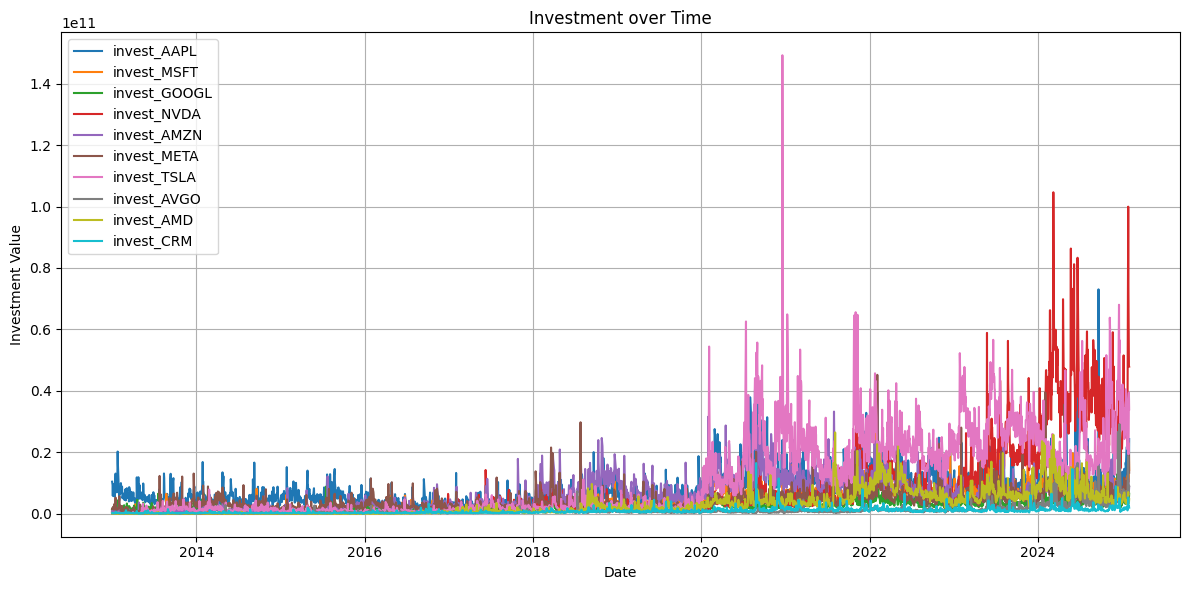

In [23]:
stock_plot = stock_macro_fed_df[[
    'date',
    'invest_AAPL','invest_MSFT','invest_GOOGL','invest_NVDA','invest_AMZN',
    'invest_META','invest_TSLA','invest_AVGO','invest_AMD','invest_CRM',
]]

plt.figure(figsize=(12, 6))  # Adjust figure size for better date visibility

# Plot each investment column against 'date'
for column in stock_plot.columns:
    if column != 'date':  # Exclude the 'date' column from the y-axis
        plt.plot(stock_plot['date'], stock_plot[column], label=column)

plt.xlabel('Date')
plt.ylabel('Investment Value')
plt.title('Investment over Time')
plt.legend(loc='upper left')  # Add legend to distinguish lines
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


# Federal Indicators Over Time 

/tmp/ipykernel_5216/774586764.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fed_date['date'] = pd.to_datetime(fed_date['date'])


Data Ranges and Scales:
- cpi: Range [231.22, 319.09], Scale: 87.87
- fed_rate: Range [0.05, 5.33], Scale: 5.28
- consumer_confidence: Range [50.00, 101.40], Scale: 51.40
- vix: Range [9.14, 82.69], Scale: 73.55
- oil: Range [-36.98, 123.64], Scale: 160.62
- nonfarm_payrolls: Range [130424.00, 159053.00], Scale: 28629.00
- treasury_yield: Range [0.52, 4.98], Scale: 4.46
- industrial_production: Range [84.68, 104.10], Scale: 19.42
- retail_sales: Range [364127.00, 633359.00], Scale: 269232.00
- pmi: Range [11382.00, 12900.00], Scale: 1518.00


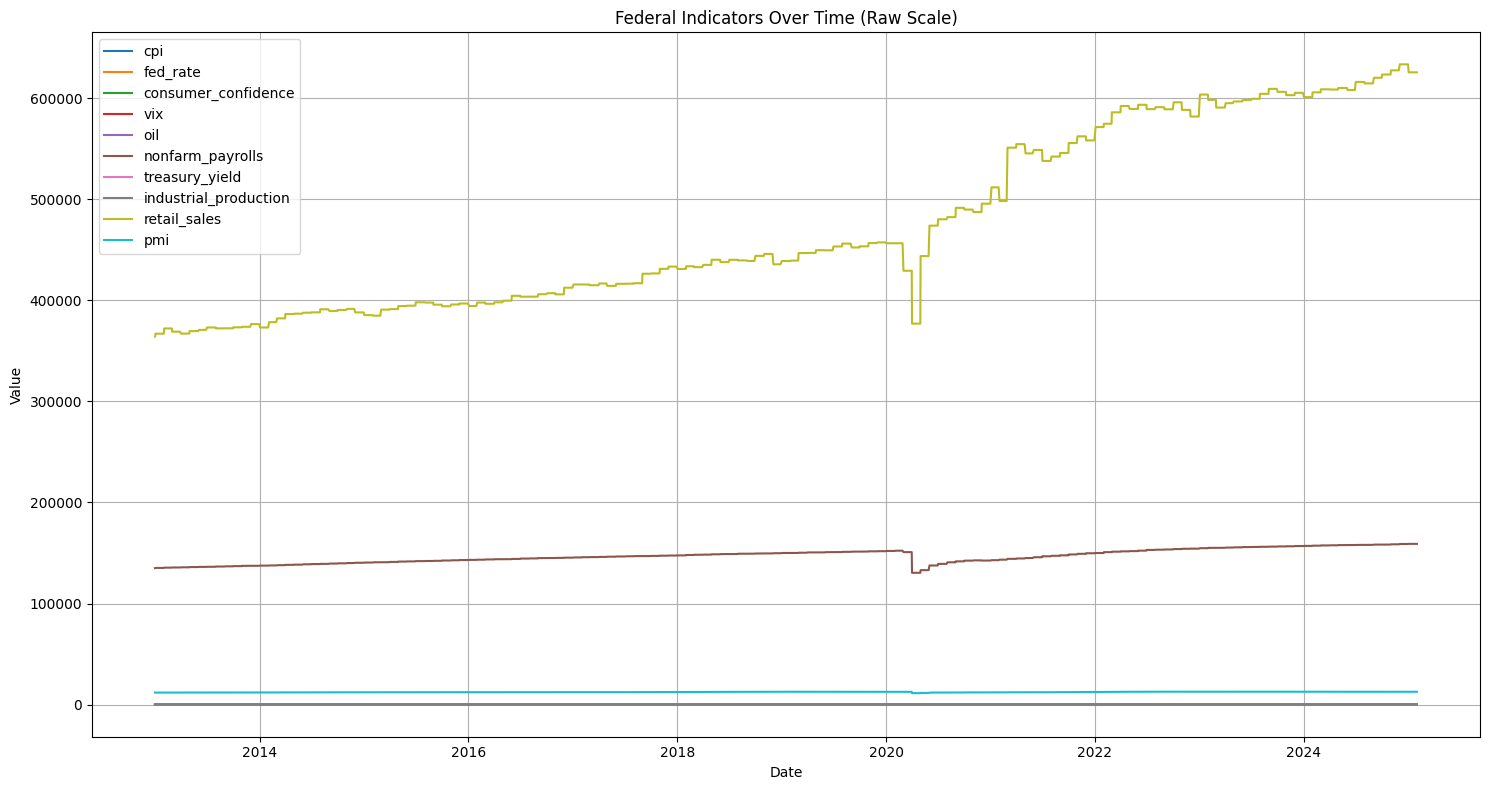

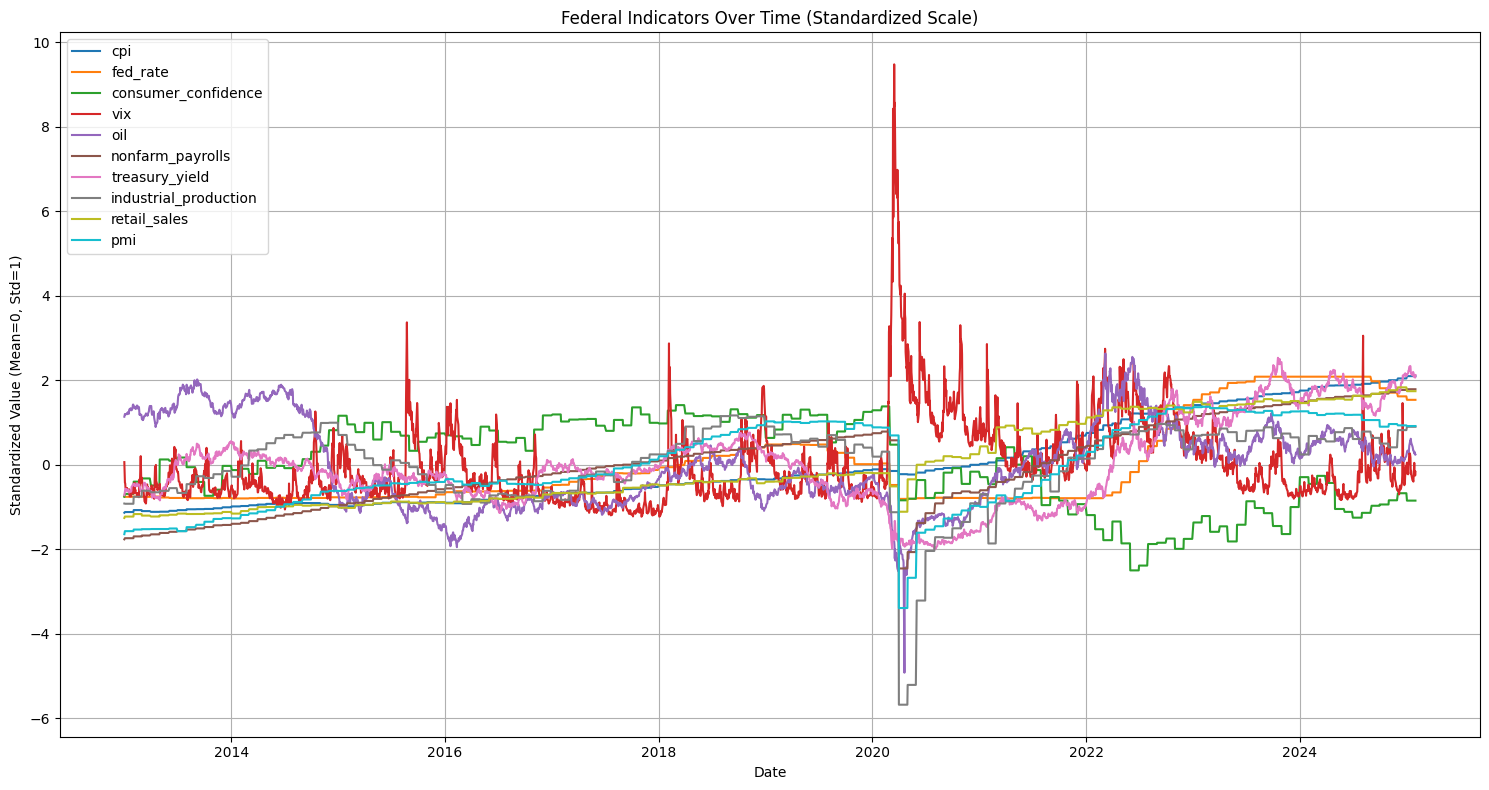

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fed_date = stock_macro_fed_df[[
    'date', 'cpi', 'fed_rate', 'consumer_confidence', 'vix', 'oil',
    'nonfarm_payrolls', 'treasury_yield', 'industrial_production', 'retail_sales', 'pmi'
]]

# Set 'date' as index for easier plotting
if 'date' in fed_date.columns:
    fed_date['date'] = pd.to_datetime(fed_date['date'])
    fed_date.set_index('date', inplace=True)
else:
    print("Error: 'date' column not found in fed_date DataFrame.")
    exit()

# --- Assess Data Ranges and Scales ---
print("Data Ranges and Scales:")
for column in fed_date.columns:
    print(f"- {column}: Range [{fed_date[column].min():.2f}, {fed_date[column].max():.2f}], Scale: {np.ptp(fed_date[column]):.2f}")

# --- Updated Plotting with Adjusted Scale ---
plt.figure(figsize=(15, 8))  # Increased figure size for better readability

for column in fed_date.columns:
    plt.plot(fed_date.index, fed_date[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Federal Indicators Over Time (Raw Scale)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plotting with Standardized Scale ---
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fed_date_scaled = fed_date.copy()
fed_date_scaled[fed_date_scaled.columns] = scaler.fit_transform(fed_date_scaled)

plt.figure(figsize=(15, 8))

for column in fed_date_scaled.columns:
    plt.plot(fed_date_scaled.index, fed_date_scaled[column], label=column)

plt.xlabel('Date')
plt.ylabel('Standardized Value (Mean=0, Std=1)')
plt.title('Federal Indicators Over Time (Standardized Scale)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro Indicators Over Time 

/tmp/ipykernel_5216/119033831.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macro_date['date'] = pd.to_datetime(macro_date['date'])


Data Ranges and Scales:
- S&P500_Index: Range [1426.19, 6118.71], Scale: 4692.52
- Dow_Jones_Index: Range [13104.14, 45014.04], Scale: 31909.90
- NASDAQ_Composite: Range [3019.51, 20173.89], Scale: 17154.38
- Russell2000_Index: Range [849.35, 2442.74], Scale: 1593.39
- VIX_Index: Range [9.14, 82.69], Scale: 73.55
- Dollar_Index_DXY: Range [79.13, 114.11], Scale: 34.98
- Gold_Futures: Range [1050.80, 2823.00], Scale: 1772.20
- WTI_Oil_Futures: Range [-37.63, 123.70], Scale: 161.33
- Copper_Futures: Range [1.94, 5.12], Scale: 3.18
- Brent_Crude_Futures: Range [19.33, 127.98], Scale: 108.65
- Tech_Sector_ETF: Range [24.50, 241.40], Scale: 216.90
- Energy_Sector_ETF: Range [19.08, 95.71], Scale: 76.63
- Financial_Sector_ETF: Range [10.60, 51.58], Scale: 40.98
- ConsumerDiscretionary_ETF: Range [41.11, 238.32], Scale: 197.21
- Lithium_ETF: Range [15.06, 93.35], Scale: 78.29
- Semiconductor_ETF: Range [14.07, 280.03], Scale: 265.96
- Electricity_Proxy: Range [23.22, 81.67], Scale: 58.45


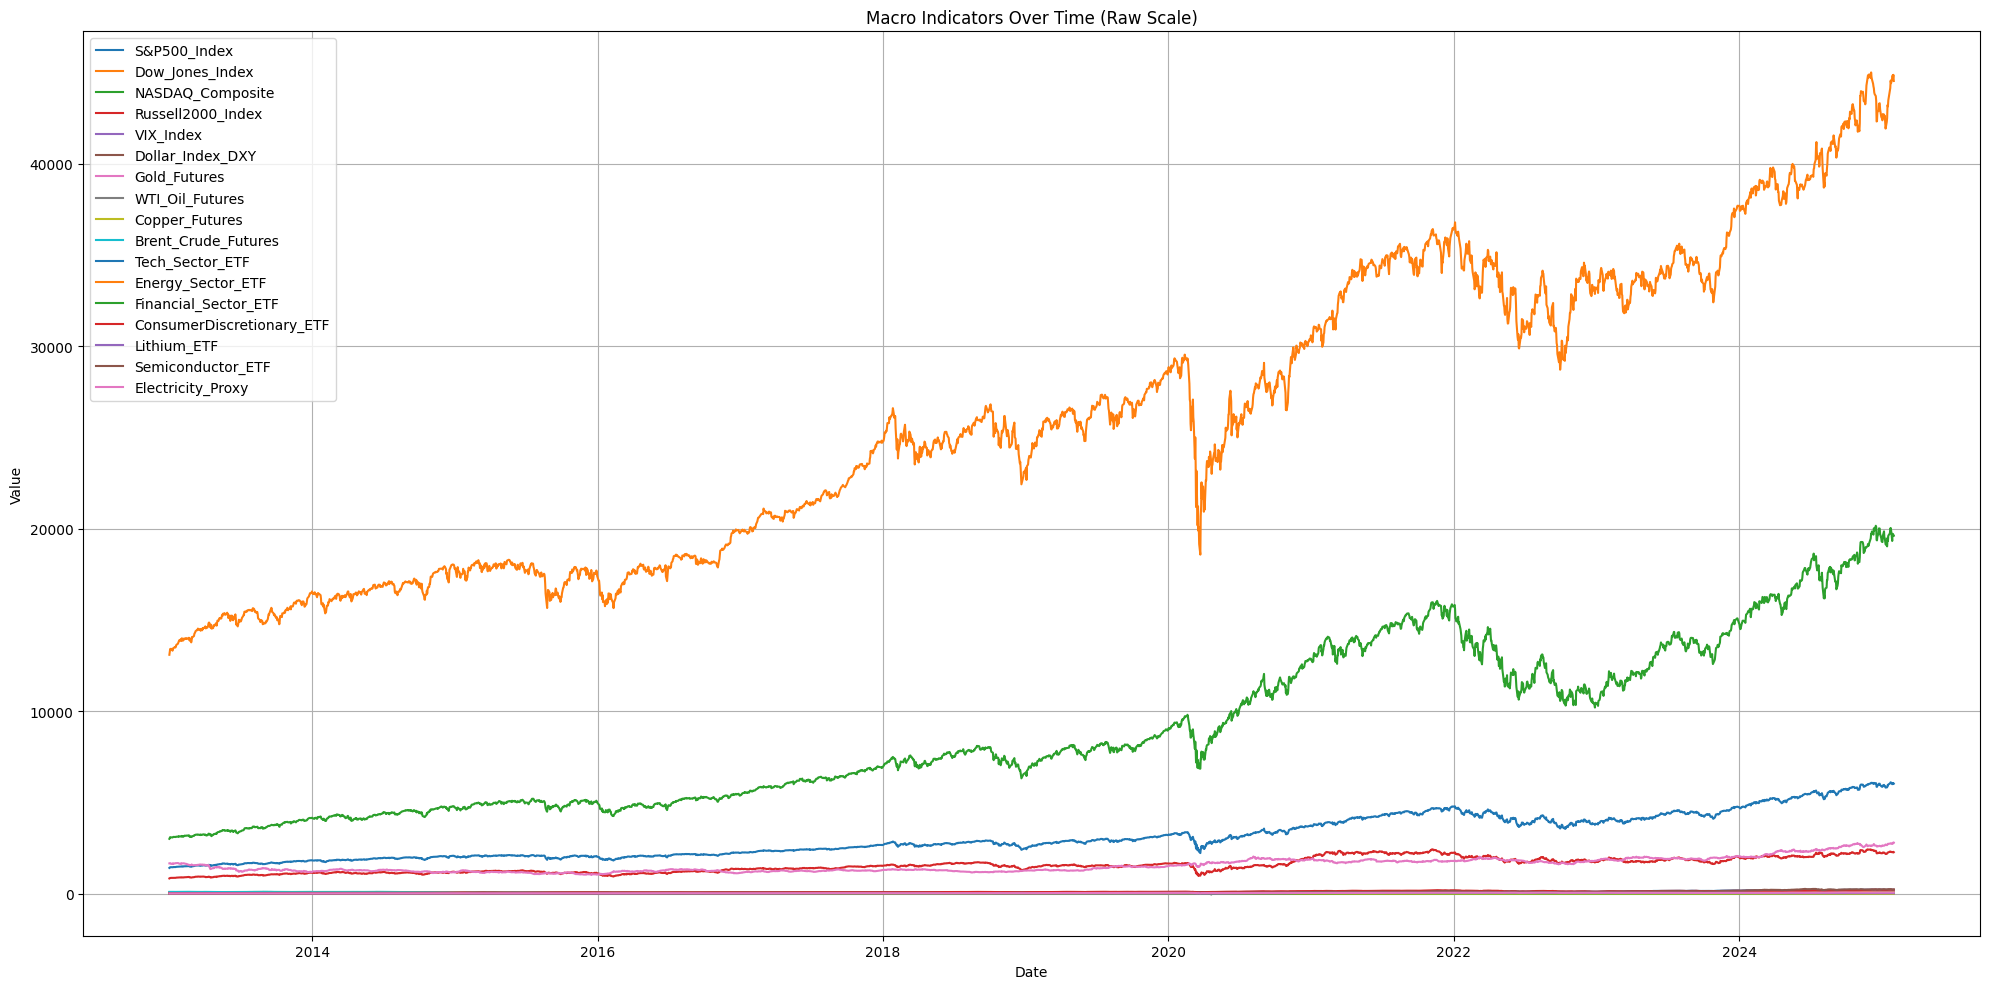

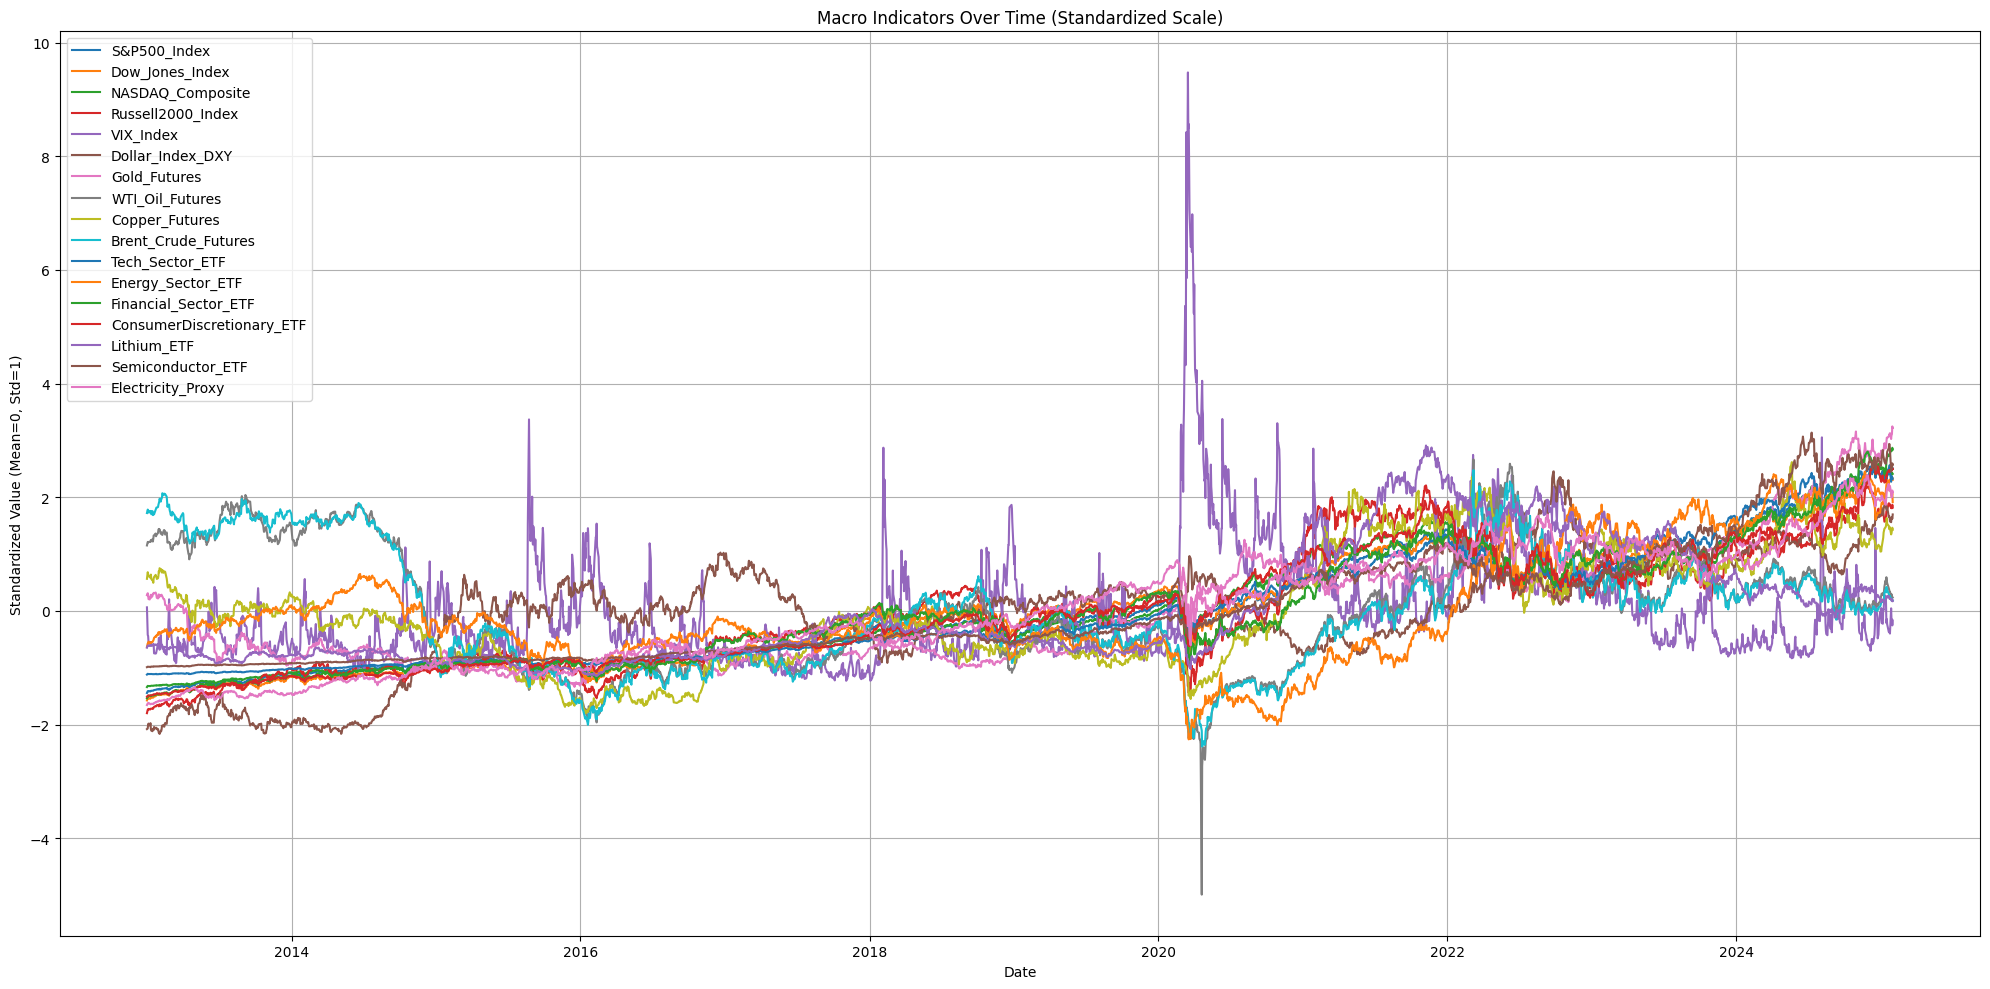

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

macro_date = stock_macro_fed_df[[
    'date', 'S&P500_Index', 'Dow_Jones_Index', 'NASDAQ_Composite',
    'Russell2000_Index', 'VIX_Index', 'Dollar_Index_DXY', 'Gold_Futures',
    'WTI_Oil_Futures', 'Copper_Futures', 'Brent_Crude_Futures',
    'Tech_Sector_ETF', 'Energy_Sector_ETF', 'Financial_Sector_ETF',
    'ConsumerDiscretionary_ETF', 'Lithium_ETF', 'Semiconductor_ETF',
    'Electricity_Proxy'
]]

# Set 'date' as index for easier plotting
if 'date' in macro_date.columns:
    macro_date['date'] = pd.to_datetime(macro_date['date'])
    macro_date.set_index('date', inplace=True)
else:
    print("Error: 'date' column not found in macro_date DataFrame.")
    exit()

# --- Assess Data Ranges and Scales ---
print("Data Ranges and Scales:")
for column in macro_date.columns:
    print(f"- {column}: Range [{macro_date[column].min():.2f}, {macro_date[column].max():.2f}], Scale: {np.ptp(macro_date[column]):.2f}")

# --- Updated Plotting with Adjusted Scale ---
plt.figure(figsize=(20, 10))  # Increased figure size for better readability

for column in macro_date.columns:
    plt.plot(macro_date.index, macro_date[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Macro Indicators Over Time (Raw Scale)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plotting with Standardized Scale ---
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
macro_date_scaled = macro_date.copy()
macro_date_scaled[macro_date_scaled.columns] = scaler.fit_transform(macro_date_scaled)

plt.figure(figsize=(20, 10))

for column in macro_date_scaled.columns:
    plt.plot(macro_date_scaled.index, macro_date_scaled[column], label=column)

plt.xlabel('Date')
plt.ylabel('Standardized Value (Mean=0, Std=1)')
plt.title('Macro Indicators Over Time (Standardized Scale)')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
pip install pandas_ta


Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas_ta as ta

In [27]:
# -------------------------------------------------------
# 📦 Feature Engineering
# -------------------------------------------------------

# 🛠️ 1. Investment Total and Individual Stock Investment Ratios
# -------------------------------------------------------

# ➡️ Calculate total daily investment across top 10 tech stocks
stock_macro_fed_df["invest_total"] = (
    stock_macro_fed_df["invest_AAPL"] + stock_macro_fed_df["invest_MSFT"] + stock_macro_fed_df["invest_GOOGL"] +
    stock_macro_fed_df["invest_NVDA"] + stock_macro_fed_df["invest_AMZN"] + stock_macro_fed_df["invest_META"] +
    stock_macro_fed_df["invest_TSLA"] + stock_macro_fed_df["invest_AVGO"] + stock_macro_fed_df["invest_AMD"] +
    stock_macro_fed_df["invest_CRM"]
)

# ➡️ Calculate each company's investment share (ratio)
for stock in ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'AMZN', 'META', 'TSLA', 'AVGO', 'AMD', 'CRM']:
    stock_macro_fed_df[f"invest_{stock}_ratio"] = stock_macro_fed_df[f"invest_{stock}"] / stock_macro_fed_df["invest_total"]

# -------------------------------------------------------
# 🛠️ 2. Time Features Extraction
# -------------------------------------------------------

# ➡️ Extract time-based features from 'date'
stock_macro_fed_df['day_of_week'] = stock_macro_fed_df['date'].dt.dayofweek        # 0 = Monday, 6 = Sunday
stock_macro_fed_df['month'] = stock_macro_fed_df['date'].dt.month                  # 1 = January, 12 = December
stock_macro_fed_df['week_number'] = stock_macro_fed_df['date'].dt.isocalendar().week  # ISO week number (1-53)
stock_macro_fed_df['is_month_end'] = stock_macro_fed_df['date'].dt.is_month_end.astype(int)  # 1 if last trading day of month

# -------------------------------------------------------
# 🛠️ 3. Set Up DataFrame for Feature Engineering
# -------------------------------------------------------

# ➡️ Make a working copy
df = stock_macro_fed_df.copy()

# ➡️ Ensure 'date' is datetime type and set it as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# -------------------------------------------------------
# 🛠️ 4. First Differencing for Macroeconomic and Indices Variables
# -------------------------------------------------------

# ➡️ Columns related to macroeconomics, indices, ETFs
macro_and_indices_cols = [
    'cpi', 'fed_rate', 'consumer_confidence', 'vix', 'oil', 'nonfarm_payrolls', 'treasury_yield',
    'industrial_production', 'retail_sales', 'pmi',
    'S&P500_Index', 'Dow_Jones_Index', 'NASDAQ_Composite', 'Russell2000_Index', 'VIX_Index',
    'Dollar_Index_DXY', 'Gold_Futures', 'WTI_Oil_Futures', 'Copper_Futures', 'Brent_Crude_Futures',
    'Tech_Sector_ETF', 'Energy_Sector_ETF', 'Financial_Sector_ETF', 'ConsumerDiscretionary_ETF',
    'Lithium_ETF', 'Semiconductor_ETF', 'Electricity_Proxy'
]

# ➡️ Apply first differencing to remove trend
for col in macro_and_indices_cols:
    if col in df.columns:
        df[f'{col}_diff'] = df[col].diff()

# -------------------------------------------------------
# 🛠️ 5. Stock Price Feature Engineering
# -------------------------------------------------------

stocks = ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'AMZN', 'META', 'TSLA', 'AVGO', 'AMD', 'CRM']

for stock in stocks:
    for field in ['close', 'open', 'high', 'low']:
        col = f'{field}_{stock}'
        if col in df.columns:
            # ➡️ Differencing for stationarity
            df[f'{col}_diff'] = df[col].diff()
            # ➡️ Rolling mean and std dev
            df[f'{col}_rolling_mean_5'] = df[col].rolling(window=5).mean()
            df[f'{col}_rolling_std_5'] = df[col].rolling(window=5).std()
            df[f'{col}_rolling_mean_20'] = df[col].rolling(window=20).mean()
            df[f'{col}_rolling_std_20'] = df[col].rolling(window=20).std()
            # ➡️ Create lag features
            for lag in [1, 3, 5, 10]:
                df[f'{col}_lag_{lag}'] = df[col].shift(lag)

    # ➡️ Technical Indicators (RSI and MACD)
    close_col = f'close_{stock}'
    if close_col in df.columns:
        df[f'{stock}_RSI'] = ta.rsi(df[close_col], length=14)
        macd = ta.macd(df[close_col])
        if macd is not None:
            df[f'{stock}_MACD'] = macd['MACD_12_26_9']
            df[f'{stock}_MACD_signal'] = macd['MACDs_12_26_9']
            df[f'{stock}_MACD_hist'] = macd['MACDh_12_26_9']

    # ➡️ Volume-based Features
    vol_col = f'volume_{stock}'
    if vol_col in df.columns:
        df[f'{vol_col}_log'] = np.log1p(df[vol_col])
        df[f'{vol_col}_diff'] = df[f'{vol_col}_log'].diff()

    # ➡️ Price Delta, Avg, Ratio, Investment Differencing
    for suffix in ['delta_price', 'avg_price', 'price_ratio', 'invest']:
        derived_col = f'{suffix}_{stock}'
        if derived_col in df.columns:
            df[f'{derived_col}_diff'] = df[derived_col].diff()

# -------------------------------------------------------
# 🛠️ 6. Portfolio Level Investment Features
# -------------------------------------------------------

portfolio_cols = [
    'invest_total', 'invest_AAPL_ratio', 'invest_MSFT_ratio', 'invest_GOOGL_ratio',
    'invest_NVDA_ratio', 'invest_AMZN_ratio', 'invest_META_ratio',
    'invest_TSLA_ratio', 'invest_AVGO_ratio', 'invest_AMD_ratio', 'invest_CRM_ratio'
]

# ➡️ Apply first differencing to investment ratios
for col in portfolio_cols:
    if col in df.columns:
        df[f'{col}_diff'] = df[col].diff()

# -------------------------------------------------------
# 🛠️ 7. Additional Time and Investment Trend Features
# -------------------------------------------------------


# ➡️ Quarter, Year, Quarter-End, Year-End flags
df['quarter'] = df.index.quarter
df['year'] = df.index.year
df['month'] = df.index.month
df['is_quarter_end'] = df.index.is_quarter_end.astype(int)
df['is_year_end'] = df.index.is_year_end.astype(int)

#(Optional) Standardize Day of Week
# If 'day_of_week' is a string like "Monday", map to numeric
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2,
               'Thursday': 3, 'Friday': 4}
if df['day_of_week'].dtype == 'object':
    df['day_of_week_num'] = df['day_of_week'].map(day_mapping)


# ➡️ Lagged and Rolling Investment Total
df['invest_total_lag_1'] = df['invest_total'].shift(1)
df['invest_total_diff'] = df['invest_total'].diff()
df['invest_total_rolling_mean_5'] = df['invest_total'].rolling(window=5).mean()

# -------------------------------------------------------
# 🧹 8. Final Cleaning Step
# -------------------------------------------------------

# ➡️ Drop rows with NaN values caused by differencing, rolling, and shifting
df.dropna(inplace=True)


/tmp/ipykernel_5216/3693771881.py:75: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_rolling_mean_20'] = df[col].rolling(window=20).mean()
/tmp/ipykernel_5216/3693771881.py:76: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_rolling_std_20'] = df[col].rolling(window=20).std()
/tmp/ipykernel_5216/3693771881.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

# Correlation Matrix

In [ ]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


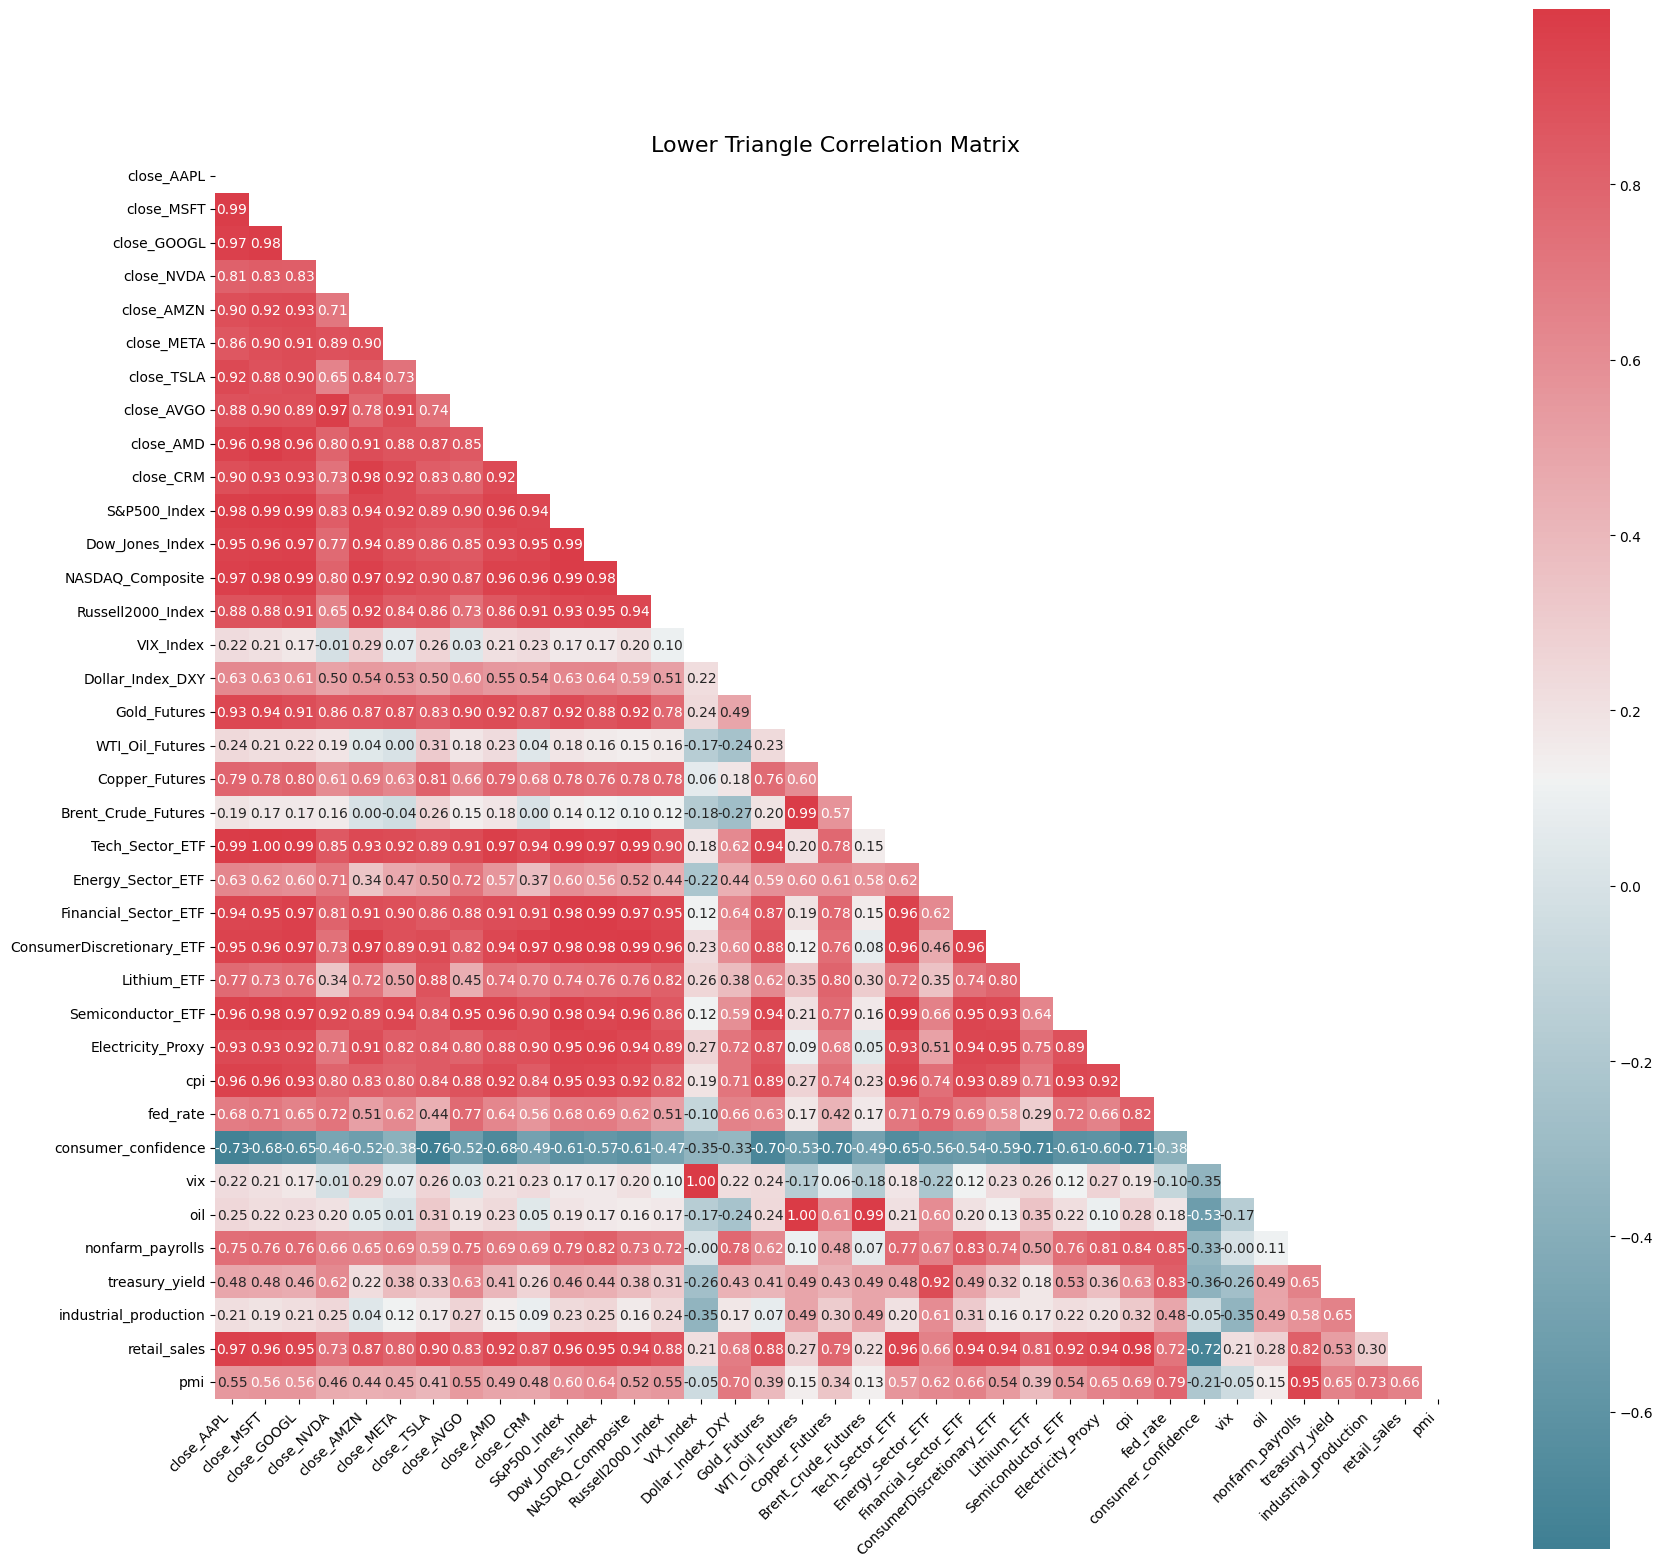


Styled Correlation Matrix (Lower Triangle):



In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

check_corr_df = df[[
    'close_AAPL', 'close_MSFT', 'close_GOOGL', 'close_NVDA', 'close_AMZN',
    'close_META', 'close_TSLA', 'close_AVGO', 'close_AMD', 'close_CRM',
    'S&P500_Index', 'Dow_Jones_Index', 'NASDAQ_Composite',
    'Russell2000_Index', 'VIX_Index', 'Dollar_Index_DXY', 'Gold_Futures',
    'WTI_Oil_Futures', 'Copper_Futures', 'Brent_Crude_Futures',
    'Tech_Sector_ETF', 'Energy_Sector_ETF', 'Financial_Sector_ETF',
    'ConsumerDiscretionary_ETF', 'Lithium_ETF', 'Semiconductor_ETF',
    'Electricity_Proxy',
    'cpi', 'fed_rate', 'consumer_confidence', 'vix', 'oil',
    'nonfarm_payrolls', 'treasury_yield', 'industrial_production',
    'retail_sales', 'pmi'
]]

corr_df = check_corr_df.corr()

# 1. Create a Mask for the Upper Triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# 2. Create a Styled Correlation Matrix with Lower Triangle and Meaningful Colors
def styled_lower_triangle_heatmap(df, title="Correlation Matrix"):
    """
    Displays a styled correlation matrix with only the lower triangle visible.

    Args:
        df (pd.DataFrame): The correlation matrix.
        title (str, optional): The title of the heatmap. Defaults to "Correlation Matrix".
    """

    styled_df = df.style.format(precision=2).background_gradient(
        cmap=sns.diverging_palette(220, 10, as_cmap=True),  # Use a diverging color palette
        axis=None,
    ).set_properties(**{'font-size': '8pt'})  # Adjust font size as needed

    # Apply the mask to hide the upper triangle (does not work directly with style)
    masked_df = df.copy()
    masked_df[mask] = np.nan  # Replace upper triangle with NaN

    # Convert to a DataFrame suitable for display (including index as a column)
    display_df = masked_df.reset_index().melt('index')
    display_df.dropna(inplace=True)  # Remove NaN values

    # Create the heatmap using seaborn for better control
    plt.figure(figsize=(20, 20))  # Adjust figure size as needed
    sns.heatmap(
        masked_df,
        annot=True,  # Display correlation values in the heatmap
        fmt=".2f",   # Format of the annotations
        cmap=sns.diverging_palette(220, 10, as_cmap=True),
        mask=mask,  # Apply the mask in seaborn
        cbar=True,  # Show the color bar
        square=True, # Ensure the heatmap cells are square
    )
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.yticks(rotation=0)
    plt.show()

    return styled_df

styled_corr_df = styled_lower_triangle_heatmap(corr_df, title="Lower Triangle Correlation Matrix")

# 3. Print the Styled Correlation Matrix (Table)
print("\nStyled Correlation Matrix (Lower Triangle):\n")
display(styled_corr_df)  # Use display() in a notebook environment

# 📦 Advanced Time Series Decomposition (Trend, Seasonality, Residuals)

In [29]:
# -------------------------------------------------------
# 📦 Advanced Time Series Decomposition: Trend, Seasonality, Residual
# -------------------------------------------------------

from statsmodels.tsa.seasonal import STL

# --------------------------
# 🛠️ Parameters
# --------------------------

# ➡️ Choose important columns to decompose (you can expand this list)
columns_to_decompose = [
    'close_AAPL', 'close_MSFT', 'close_GOOGL', 'close_NVDA', 'close_AMZN',
    'close_META', 'close_TSLA', 'close_AVGO', 'close_AMD', 'close_CRM',
    'S&P500_Index', 'Dow_Jones_Index', 'NASDAQ_Composite',
    'Russell2000_Index', 'VIX_Index', 'Dollar_Index_DXY', 'Gold_Futures',
    'WTI_Oil_Futures', 'Copper_Futures', 'Brent_Crude_Futures',
    'Tech_Sector_ETF', 'Energy_Sector_ETF', 'Financial_Sector_ETF',
    'ConsumerDiscretionary_ETF', 'Lithium_ETF', 'Semiconductor_ETF',
    'Electricity_Proxy',
    'cpi', 'fed_rate', 'consumer_confidence', 'vix', 'oil',
    'nonfarm_payrolls', 'treasury_yield', 'industrial_production',
    'retail_sales', 'pmi'
]

# ➡️ Set seasonality period
# (252 trading days ≈ 1 year seasonality for stock data)
seasonal_period = 252

# --------------------------
# 🛠️ Decomposition
# --------------------------

# Loop through each selected feature
for col in columns_to_decompose:
    if col in df.columns:
        try:
            # ➡️ Apply STL decomposition
            stl = STL(df[col].dropna(), period=seasonal_period)
            result = stl.fit()
            
            # ➡️ Save trend, seasonal, and residual components as new columns
            df[f'{col}_trend'] = result.trend
            df[f'{col}_seasonal'] = result.seasonal
            df[f'{col}_residual'] = result.resid
            
            print(f"✅ Decomposed: {col}")
        
        except Exception as e:
            print(f"❌ Error decomposing {col}: {e}")
    else:
        print(f"⚠️ Column not found: {col}")

# --------------------------
# 🧹 Cleaning (optional)
# --------------------------

# ➡️ After decomposition, drop rows with NaN if needed (optional)
df.dropna(inplace=True)
# (Because decomposition will create NaNs at the start and end due to windowing)

/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: close_AAPL
✅ Decomposed: close_MSFT


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: close_GOOGL
✅ Decomposed: close_NVDA


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: close_AMZN
✅ Decomposed: close_META


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: close_TSLA


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: close_AVGO


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: close_AMD
✅ Decomposed: close_CRM


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: S&P500_Index


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: Dow_Jones_Index


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: NASDAQ_Composite
✅ Decomposed: Russell2000_Index


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: VIX_Index


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: Dollar_Index_DXY


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: Gold_Futures


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: WTI_Oil_Futures
✅ Decomposed: Copper_Futures


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: Brent_Crude_Futures


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: Tech_Sector_ETF
✅ Decomposed: Energy_Sector_ETF


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: Financial_Sector_ETF


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: ConsumerDiscretionary_ETF


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: Lithium_ETF


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: Semiconductor_ETF


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: Electricity_Proxy


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: cpi
✅ Decomposed: fed_rate


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: consumer_confidence


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: vix


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: oil
✅ Decomposed: nonfarm_payrolls


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: treasury_yield


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: industrial_production


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

✅ Decomposed: retail_sales
✅ Decomposed: pmi


/tmp/ipykernel_5216/3986635644.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_trend'] = result.trend
/tmp/ipykernel_5216/3986635644.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{col}_seasonal'] = result.seasonal
/tmp/ipykernel_5216/3986635644.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

## 📊 STL Decomposition Summary

This section decomposes the selected time series into three components using **STL (Seasonal-Trend Decomposition using Loess)**:

**Formula:**

\[
\text{Original}_t = \text{Trend}_t + \text{Seasonality}_t + \text{Residual}_t
\]

- **Original**: The raw time series (e.g., `close_AAPL`)
- **Trend**: Long-term smooth movement (extracted via Loess)
- **Seasonality**: Repeating patterns (e.g., yearly cycles, period = 252 trading days)
- **Residual**: Leftover noise after removing trend and seasonality

Each plot visualizes:
1. Original time series
2. Trend component
3. Seasonal component
4. Residual (random noise)

This decomposition helps us:
- Understand underlying structure
- Remove noise or seasonality before modeling
- Check if residuals are stationary for forecasting



✅ Decomposed and plotting: close_AAPL


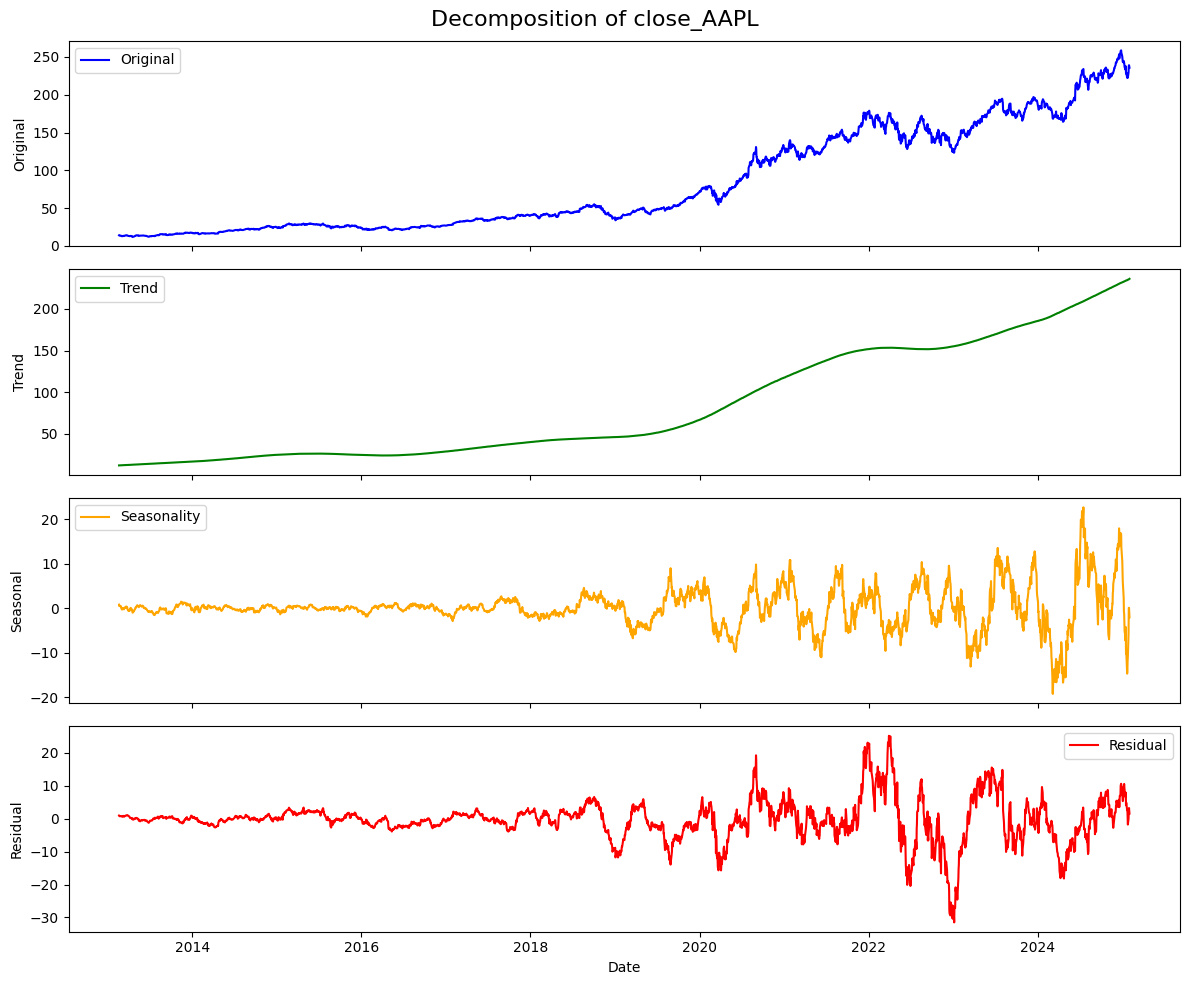

✅ Decomposed and plotting: close_MSFT


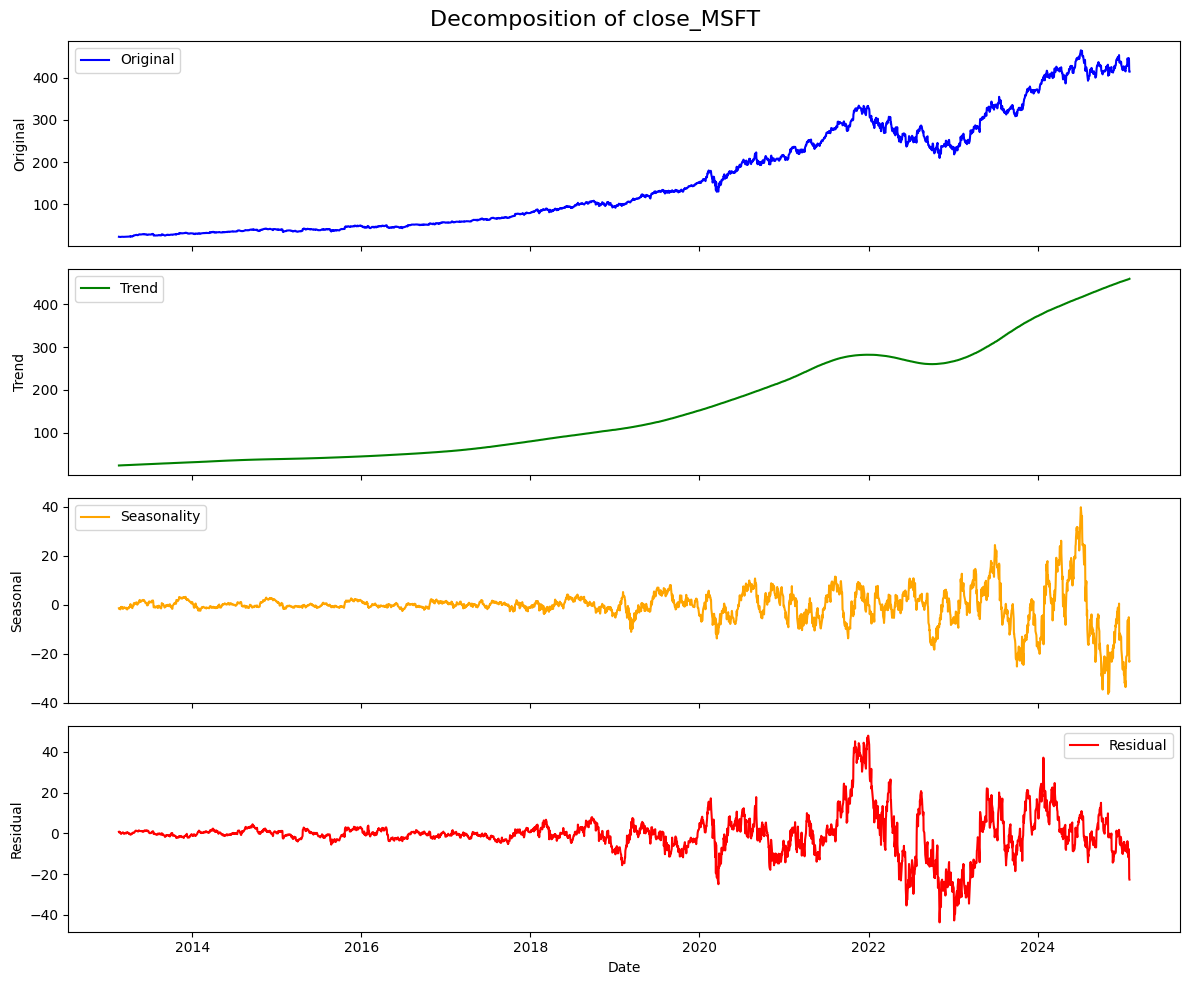

✅ Decomposed and plotting: close_GOOGL


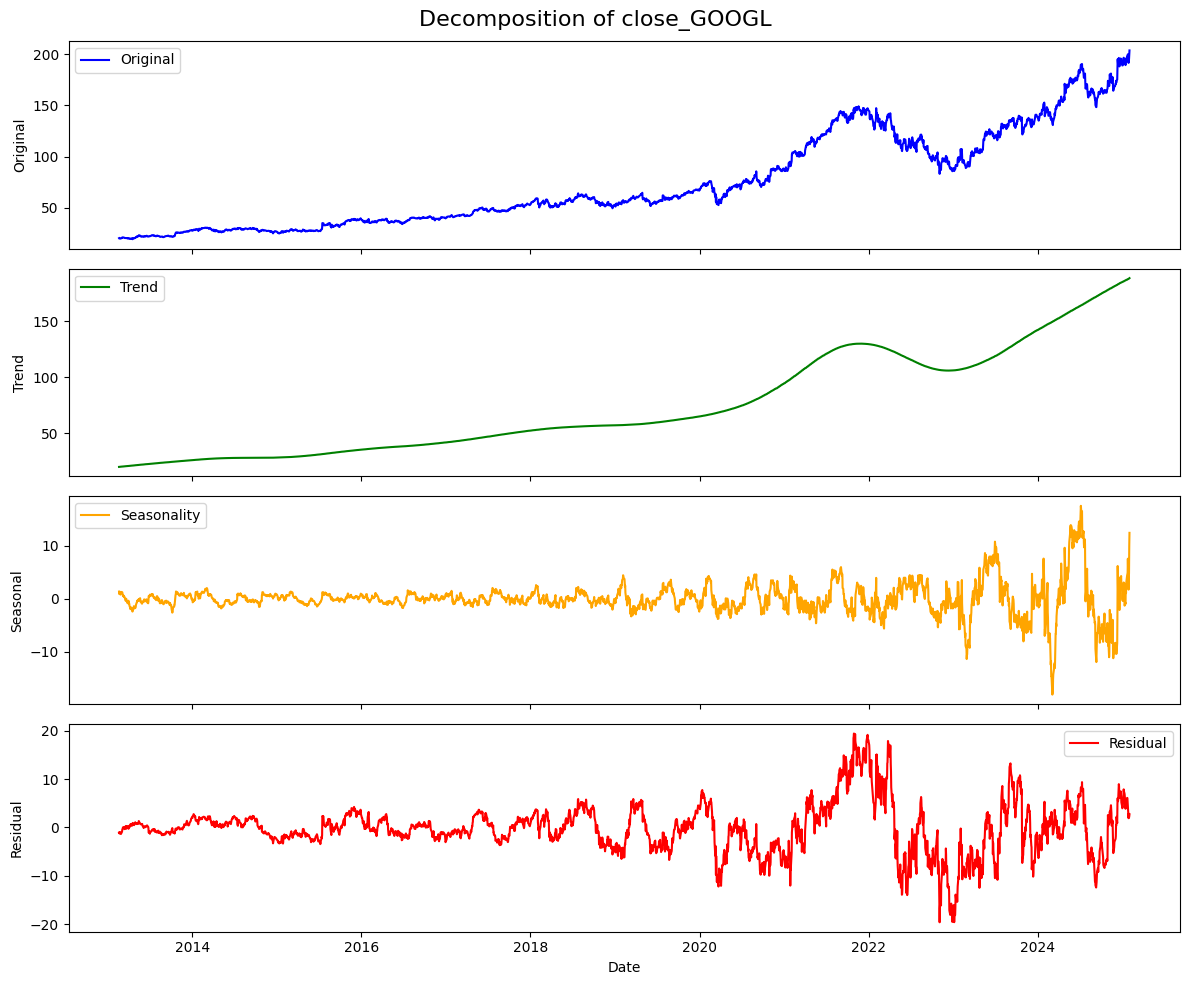

✅ Decomposed and plotting: S&P500_Index


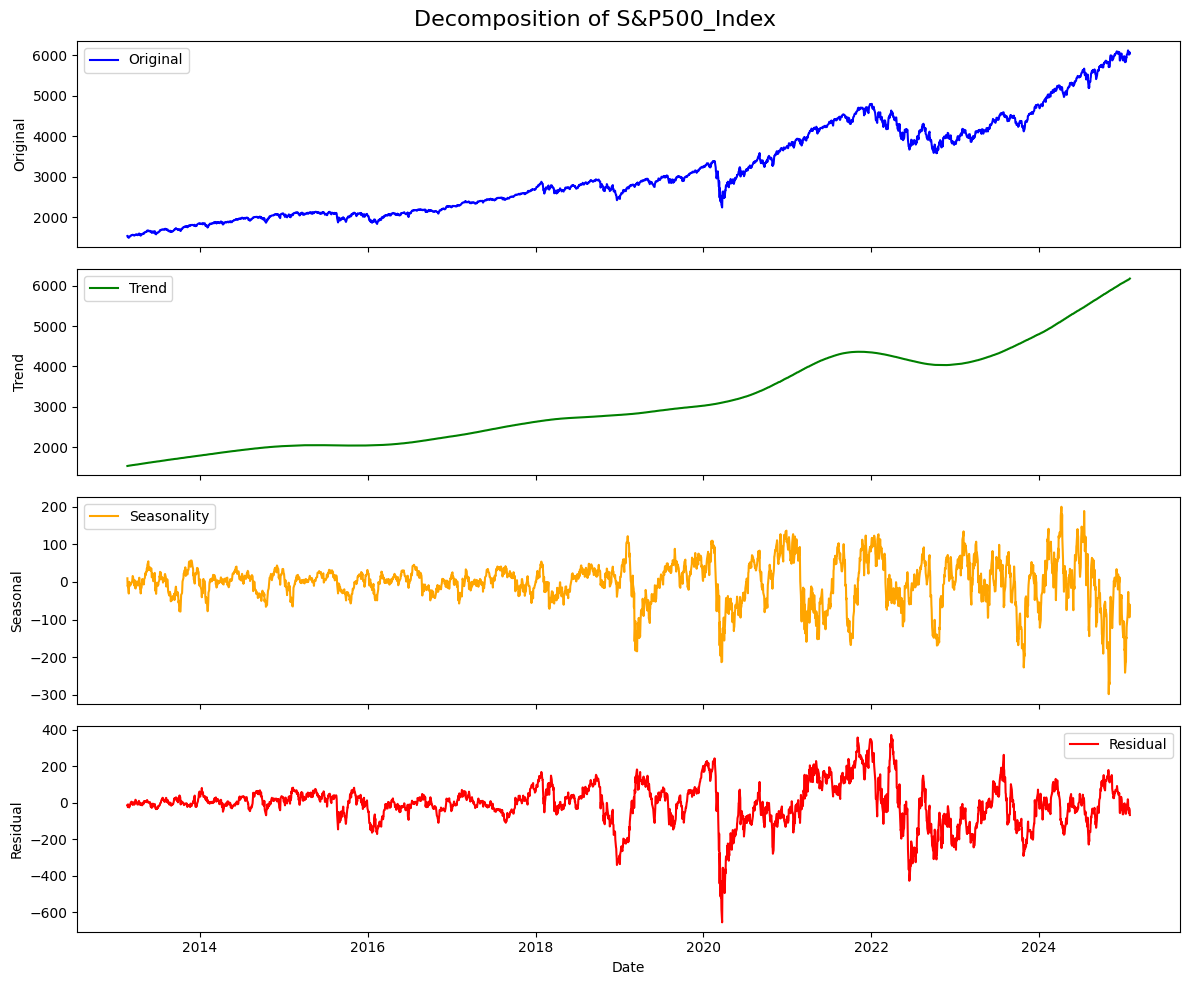

✅ Decomposed and plotting: Gold_Futures


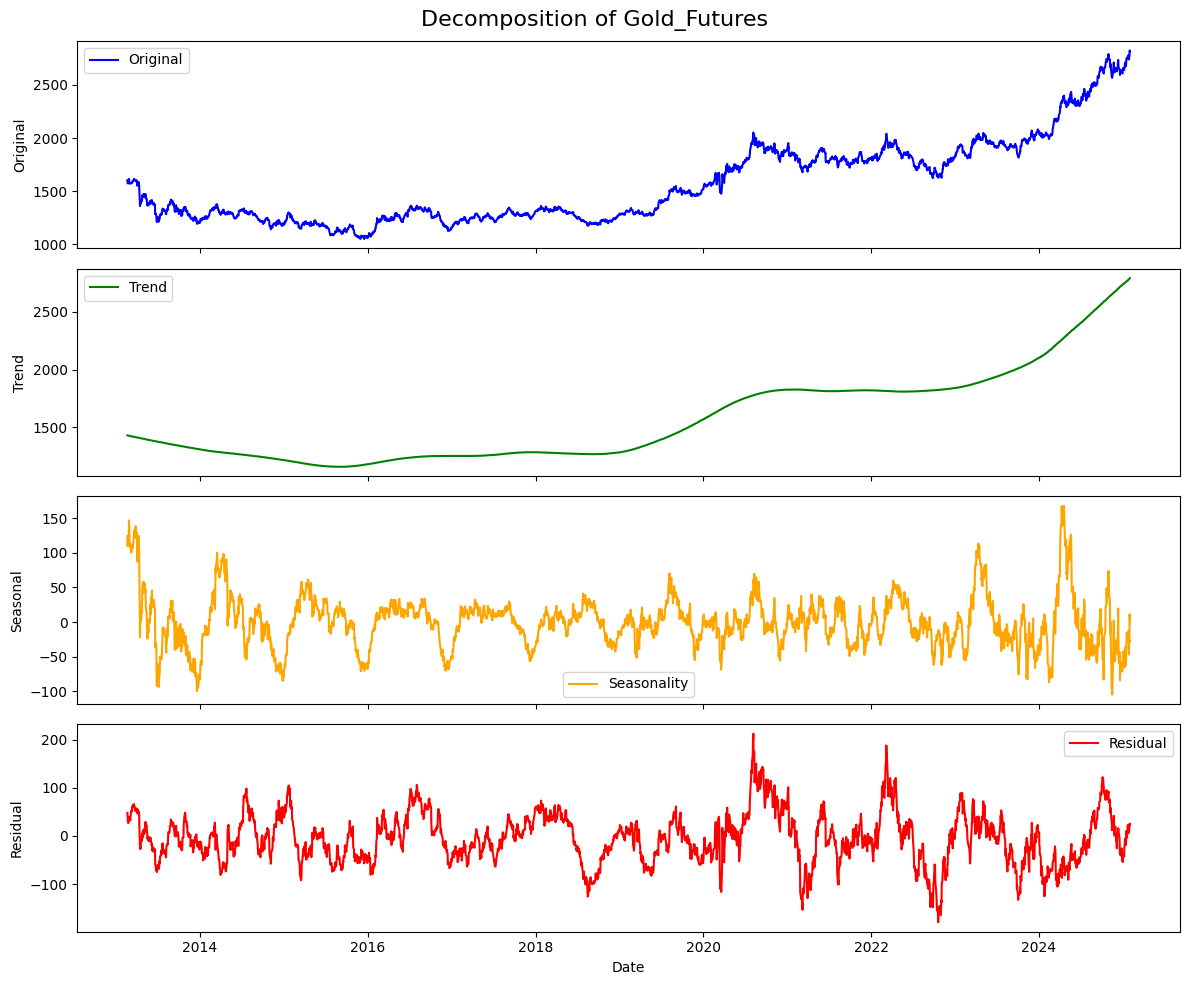

✅ Decomposed and plotting: cpi


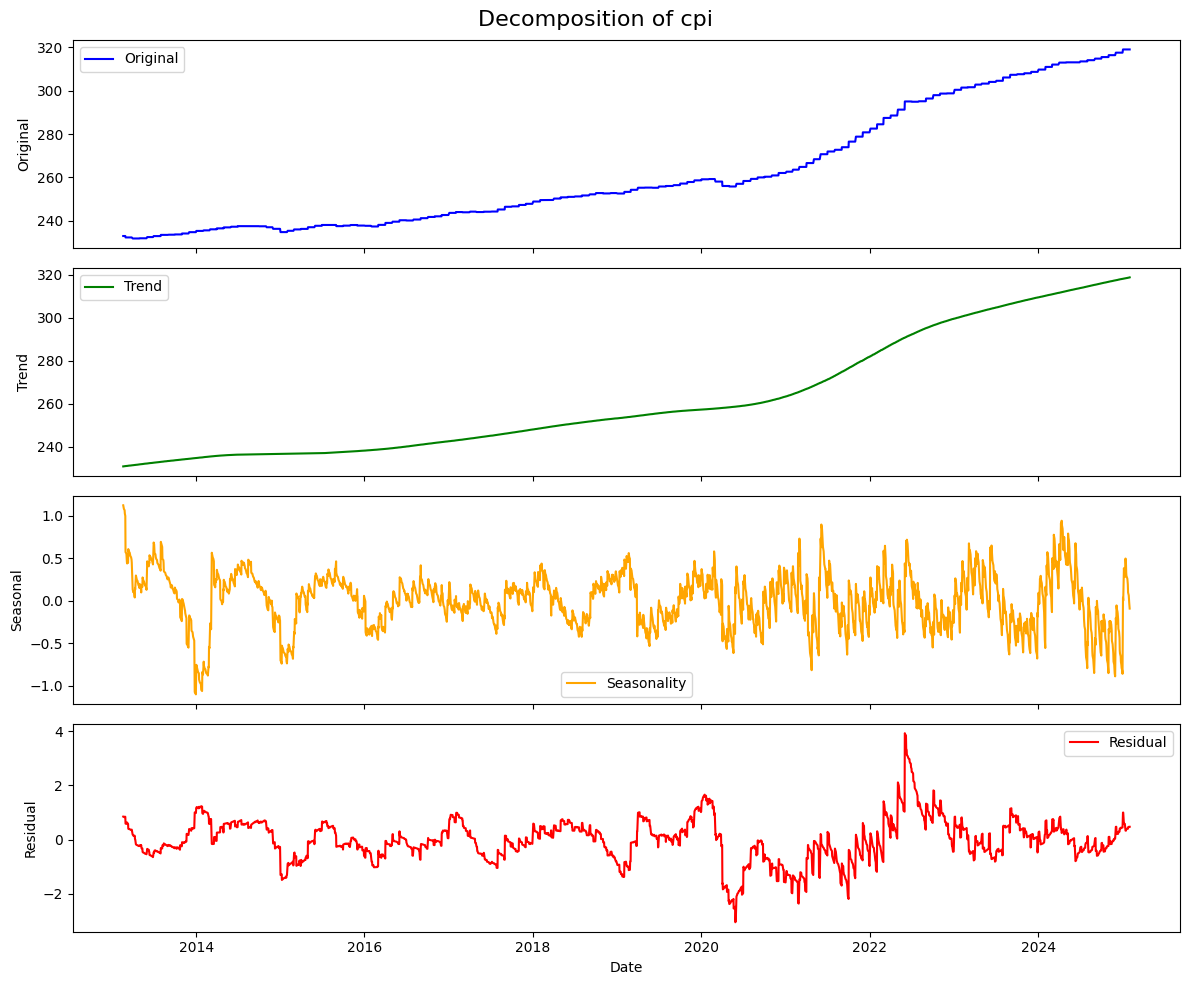

In [30]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Choose columns to decompose
columns_to_decompose = [
    'close_AAPL', 'close_MSFT', 'close_GOOGL', # you can add more
    'S&P500_Index', 'Gold_Futures', 'cpi' # examples
]

# Set seasonality period
seasonal_period = 252

# Loop through each selected feature
for col in columns_to_decompose:
    if col in df.columns:
        try:
            # Apply STL decomposition
            stl = STL(df[col].dropna(), period=seasonal_period)
            result = stl.fit()
            
            # Save trend, seasonal, residual
            df[f'{col}_trend'] = result.trend
            df[f'{col}_seasonal'] = result.seasonal
            df[f'{col}_residual'] = result.resid
            
            print(f"✅ Decomposed and plotting: {col}")
            
            # --- Plotting each component separately ---
            fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
            fig.suptitle(f"Decomposition of {col}", fontsize=16)

            axes[0].plot(df.index, df[col], label='Original', color='blue')
            axes[0].set_ylabel('Original')
            axes[0].legend()

            axes[1].plot(df.index, df[f'{col}_trend'], label='Trend', color='green')
            axes[1].set_ylabel('Trend')
            axes[1].legend()

            axes[2].plot(df.index, df[f'{col}_seasonal'], label='Seasonality', color='orange')
            axes[2].set_ylabel('Seasonal')
            axes[2].legend()

            axes[3].plot(df.index, df[f'{col}_residual'], label='Residual', color='red')
            axes[3].set_ylabel('Residual')
            axes[3].legend()

            plt.xlabel('Date')
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"❌ Error decomposing {col}: {e}")
    else:
        print(f"⚠️ Column not found: {col}")


# Stationarity Testing (ADF) for Time Series Modeling

In [31]:
# -------------------------------------------------------
# 📦 Double Stationarity Test: ADF + KPSS for All Columns
# -------------------------------------------------------

from statsmodels.tsa.stattools import adfuller, kpss

# --------------------------
# 🛠️ Parameters
# --------------------------

# ➡️ Columns to test
columns_to_test = df.select_dtypes(include='number').columns.tolist()

# ➡️ Prepare to collect results
stationarity_results = []

# --------------------------
# 🛠️ Testing Loop
# --------------------------

for col in columns_to_test:
    try:
        # ➡️ Drop NaN values
        series = df[col].dropna()

        # --- ADF Test ---
        adf_result = adfuller(series, autolag='AIC')
        adf_pvalue = adf_result[1]
        adf_stationary = adf_pvalue < 0.05  # Stationary if p-value < 0.05

        # --- KPSS Test ---
        kpss_result = kpss(series, regression='c', nlags="auto")
        kpss_pvalue = kpss_result[1]
        kpss_stationary = kpss_pvalue > 0.05  # Stationary if p-value > 0.05

        # --- Final Conclusion ---
        if adf_stationary and kpss_stationary:
            final_conclusion = True
        else:
            final_conclusion = False

        # ➡️ Append results
        stationarity_results.append({
            'Feature': col,
            'ADF p-value': round(adf_pvalue, 5),
            'ADF Stationary': adf_stationary,
            'KPSS p-value': round(kpss_pvalue, 5),
            'KPSS Stationary': kpss_stationary,
            'is_Stationary': final_conclusion
        })

    except Exception as e:
        print(f"⚠️ Error testing {col}: {e}")

# --------------------------
# 📜 Convert to DataFrame
# --------------------------

stationarity_df = pd.DataFrame(stationarity_results)

# ➡️ Display results
stationarity_df.sort_values('is_Stationary', ascending=False).reset_index(drop=True)



/tmp/ipykernel_5216/1172396534.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")
/tmp/ipykernel_5216/1172396534.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")
/tmp/ipykernel_5216/1172396534.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags="auto")
/tmp/ipykernel_5216/1172396534.py:32: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  k

Feature  ADF p-value  ADF Stationary  KPSS p-value   
0                 pmi_residual      0.00000            True          0.10  \
1               high_TSLA_diff      0.00000            True          0.10   
2              close_AAPL_diff      0.00000            True          0.10   
3       invest_AAPL_ratio_diff      0.00000            True          0.10   
4            invest_total_diff      0.00000            True          0.10   
..                         ...          ...             ...           ...   
742   low_GOOGL_rolling_mean_5      0.99581           False          0.01   
743    low_GOOGL_rolling_std_5      0.05656           False          0.01   
744  low_GOOGL_rolling_mean_20      0.99383           False          0.01   
745   low_GOOGL_rolling_std_20      0.03938            True          0.01   
746   low_AMZN_rolling_mean_20      0.97887           False          0.01   

     KPSS Stationary  is_Stationary  
0               True           True  
1               True           True  
2               True           True  
3               True           True  
4               True           True  
..               ...            ...  
742            False          False  
743            False          False  
744            False          False  
745            False          False  
746            False          False  

[747 rows x 6 columns]

In [32]:
stationarity_df['is_Stationary'].value_counts()

is_Stationary
False    524
True     223
Name: count, dtype: int64

# Advanced Stationarity Fix: Second Diff, Residuals, Log Returns

In [33]:
# -------------------------------------------------------
# 🧠 Advanced Stationarity Fix: Second Diff, Residuals, Log Returns
# -------------------------------------------------------

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import STL
import numpy as np

# -----------------------------------------------
# 1. Detect non-stationary features from previous results
# -----------------------------------------------

# Filter only non-stationary features
non_stationary_cols = stationarity_df[stationarity_df['is_Stationary'] == False]['Feature'].tolist()

# Prepare result collector
fixed_results = []

# -----------------------------------------------
# 2. Define Helper: Run ADF + KPSS and interpret
# -----------------------------------------------

def test_stationarity(series):
    try:
        adf_p = adfuller(series.dropna())[1]
    except:
        adf_p = np.nan
    try:
        kpss_p = kpss(series.dropna(), regression='c', nlags="auto")[1]
    except:
        kpss_p = np.nan
    adf_stat = adf_p < 0.05 if not np.isnan(adf_p) else False
    kpss_stat = kpss_p > 0.05 if not np.isnan(kpss_p) else False
    conclusion = True if adf_stat and kpss_stat else False
    return adf_p, adf_stat, kpss_p, kpss_stat, conclusion

# -----------------------------------------------
# 3. Loop through each non-stationary feature and fix
# -----------------------------------------------

for col in non_stationary_cols:
    try:
        series = df[col].dropna()

        # --- Try log return if column has only positive values
        if (series > 0).all():
            transformed = np.log(series / series.shift(1))
            method = "log_return"

        # --- Otherwise, try second differencing
        else:
            transformed = series.diff().diff()
            method = "second_diff"

        # --- If still looks trended, try residual from STL
        if transformed.dropna().std() == 0 or transformed.isna().mean() > 0.5:
            stl = STL(series, period=252)
            transformed = stl.fit().resid
            method = "stl_residual"

        # --- Run stationarity tests on transformed version
        adf_p, adf_ok, kpss_p, kpss_ok, conclusion = test_stationarity(transformed)

        # --- Append result
        fixed_results.append({
            'Feature': col,
            'Fix Method': method,
            'ADF p-value': round(adf_p, 5) if adf_p is not None else None,
            'ADF Stationary': adf_ok,
            'KPSS p-value': round(kpss_p, 5) if kpss_p is not None else None,
            'KPSS Stationary': kpss_ok,
            'is_Stationary': conclusion
        })

        # Save transformed back into df (optional)
        df[f'{col}_{method}'] = transformed

    except Exception as e:
        print(f"⚠️ Error processing {col}: {e}")

# -----------------------------------------------
# 4. Display Fixed Result Summary
# -----------------------------------------------

fixed_stationarity_df = pd.DataFrame(fixed_results)
fixed_stationarity_df.sort_values('is_Stationary', ascending=False).reset_index(drop=True)


/tmp/ipykernel_5216/3762540814.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(series.dropna(), regression='c', nlags="auto")[1]
/tmp/ipykernel_5216/3762540814.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(series.dropna(), regression='c', nlags="auto")[1]
/tmp/ipykernel_5216/3762540814.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_p = kpss(series.dropna(), regression='c', nlags="auto")[1]
/tmp/ipykernel_5216/3762540814.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p

Feature   Fix Method  ADF p-value  ADF Stationary   
0                close_AAPL   log_return      0.00000            True  \
1           high_META_lag_5   log_return      0.00000            True   
2           volume_META_log   log_return      0.00000            True   
3          META_MACD_signal  second_diff      0.00000            True   
4                 META_MACD  second_diff      0.00000            True   
..                      ...          ...          ...             ...   
519      S&P500_Index_trend   log_return      0.00000            True   
520                cpi_diff  second_diff      0.00000            True   
521  Dollar_Index_DXY_trend   log_return      0.00027            True   
522      Gold_Futures_trend   log_return      0.18312           False   
523           fed_rate_diff  second_diff      0.00000            True   

     KPSS p-value  KPSS Stationary  is_Stationary  
0         0.10000             True           True  
1         0.10000             True           True  
2         0.10000             True           True  
3         0.10000             True           True  
4         0.10000             True           True  
..            ...              ...            ...  
519       0.04703            False          False  
520           NaN            False          False  
521       0.04572            False          False  
522       0.01000            False          False  
523       0.04167            False          False  

[524 rows x 7 columns]

In [34]:
stationarity_df['is_Stationary'].value_counts()

is_Stationary
False    524
True     223
Name: count, dtype: int64

In [35]:
fixed_stationarity_df['is_Stationary'].value_counts()

is_Stationary
True     496
False     28
Name: count, dtype: int64

# Capstone Notebook: Stock market prediction with DeepAR

# Aktienmarkt-Vorhersage mit DeepAR

In this capstone project, we use the probabilistic DeepAR model from GluonTS to forecast daily closing prices of a stock (e.g., AAPL). We evaluate the forecasts using RMSE and MAE.


# 2. Envirnmment and dependencies

In [ ]:
pip install "gluonts[mxnet]"

In [ ]:
pip install gluonts

In [36]:
# Basis-Imports\import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# GluonTS-Komponenten
# Stelle sicher, dass du eine aktuelle GluonTS-Version installiert hast: pip install gluonts
from gluonts.dataset.common import ListDataset
# Bei neueren Versionen liegen Modelle in gluonts.mx.model
try:
    from gluonts.mx.model.deepar import DeepAREstimator
    from gluonts.mx.trainer import Trainer
except ModuleNotFoundError:
    # Fallback für ältere Versionen
    from gluonts.model.deepar import DeepAREstimator
    from gluonts.trainer import Trainer

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Hyperparameter-Tuning
import optuna

/home/haid/neuefische/capstone-SignalSigma/venv-forecast/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# 0.2 Data load (already exists)
processed_path = '../data/processed_combined_data.csv'
df = pd.read_csv(processed_path, index_col='date', parse_dates=True)
print(f"✅ Loded DataFrame: {df.shape} Records")

In [11]:


def make_dataset_with_feats(series: pd.Series, feats: np.ndarray, start_date):
    return ListDataset([
        {
            'start': pd.Timestamp(start_date),
            'target': series.values.astype(float),
            'feat_dynamic_real': feats
        }
    ], freq='D')

In [6]:

# 0.3 Train/Test Split
horizon = 30
series = df['close_AAPL']
features = df.drop(columns=['close_AAPL'])
train_series = series[:-horizon]
test_series = series[-horizon:]
train_features = features[:-horizon]
test_features = features[-horizon:]

In [ ]:

# 0.4 Feature-Arrays prepararion
train_feat_df = train_features.apply(pd.to_numeric, errors='coerce').ffill().fillna(0)
feat_dynamic_train = train_feat_df.values.T.astype(float)
test_feat_df = test_features.apply(pd.to_numeric, errors='coerce').ffill().fillna(0)
feat_dynamic_test = test_feat_df.values.T.astype(float)

In [ ]:
# 0.5 Create Datasets 
train_ds = make_dataset_with_feats(train_series, feat_dynamic_train, train_series.index[0])
test_ds  = make_dataset_with_feats(test_series,  feat_dynamic_test,  test_series.index[0])

print("✅ Initialization complete. You can now continue working on the notebook from step 1 onwards.")

# 5. Split data in Training und Test

In [ ]:
# We use 'close'-Price as target variable and all other comlums as features
horizon = 30  # predicted horizont

# complete DataFrame: df (index=date)
# TArget variable (close_AAPL') substarct

series = df['close_AAPL']

# Feature-columns (appart 'close_AAPL')
feature_cols = [c for c in df.columns if c != 'close_AAPL']
features = df[feature_cols]

# Train/Test Split
train_series = series[:-horizon]
test_series  = series[-horizon:]

train_features = features[:-horizon]
test_features  = features[-horizon:]

print(f"Training point : {len(train_series)}, Test point : {len(test_series)}")

# 6. DeepAR-Modelling with Multi-Features 

In [ ]:
from gluonts.dataset.common import ListDataset
import pandas as pd

# 1) Features as numeric Array 
# copy training features
train_feat_df = train_features.copy()
# Convert missing NaN
train_feat_df = train_feat_df.apply(pd.to_numeric, errors='coerce')
# Replace NaN (with  0 or interpolate )
train_feat_df = train_feat_df.fillna(method='ffill').fillna(0)
# Transponieren → shape: (num_features, time_length)
feat_dynamic_train = train_feat_df.values.T.astype(float)

# 2) Create trainings-data set 
def make_dataset_with_feats(series: pd.Series, feats: np.ndarray, start_date):
    return ListDataset([
        {
            'start': pd.Timestamp(start_date),
            'target': series.values.astype(float),
            'feat_dynamic_real': feats
        }
    ], freq='D')

train_ds = make_dataset_with_feats(
    train_series,
    feat_dynamic_train,
    train_series.index[0]
)

# 3) Configure DeepAR-Estimator 
try:
    from gluonts.mx.model.deepar import DeepAREstimator
    from gluonts.mx.trainer import Trainer
except ModuleNotFoundError:
    from gluonts.model.deepar import DeepAREstimator
    from gluonts.trainer import Trainer

trainer = Trainer(
    epochs=20,
    learning_rate=1e-3,
    hybridize=True
)

deepar_estimator = DeepAREstimator(
    freq='D',
    prediction_length=horizon,
    trainer=trainer,
    num_layers=3,
    num_cells=64,
    cell_type='lstm'
)

deepar_predictor = deepar_estimator.train(training_data=train_ds)

100%|██████████| 50/50 [00:16<00:00,  2.95it/s, epoch=20/20, avg_epoch_loss=1.68]


# 7. Forecast and evaluate. 

In [ ]:
# 1) Test-Features 

test_feat_df = test_features.copy()

test_feat_df = test_feat_df.apply(pd.to_numeric, errors='coerce')

test_feat_df = test_feat_df.fillna(method='ffill').fillna(0)

feat_dynamic_test = test_feat_df.values.T.astype(float)

In [ ]:

# 2) Create Test-data set 
from gluonts.dataset.common import ListDataset

test_ds = ListDataset([
    {
        'start': pd.Timestamp(test_series.index[0]),  # Timestamp-Start
        'target': test_series.values.astype(float),
        'feat_dynamic_real': feat_dynamic_test
    }
], freq='D')

In [ ]:

# 3) Create forecast 
# Predictor is deepar_predictor from training
forecast_it = deepar_predictor.predict(test_ds)
forecast_obj = next(forecast_it)

In [ ]:

# 4) Extract prediction

y_pred = np.array(forecast_obj.mean)  # shape = (horizon,)
y_true = test_series.values.astype(float)  # shape = (horizon,)

In [ ]:
# 5) Calculate Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae  = mean_absolute_error(y_true, y_pred)
print(f"DeepAR mit Multifeatures - RMSE: {rmse:.2f}, MAE: {mae:.2f}")

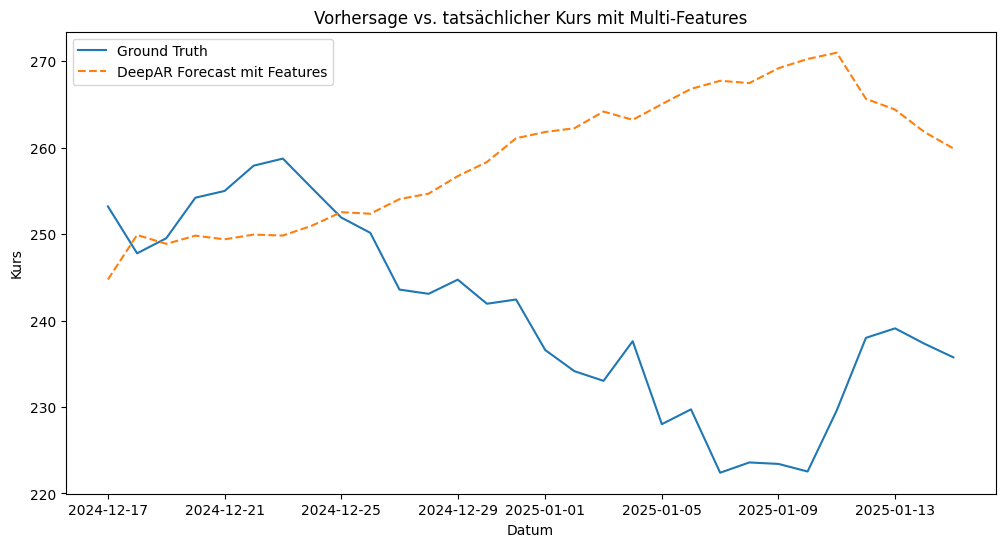

In [ ]:
# 6) Visualize
t = pd.date_range(start=test_series.index[0], periods=horizon, freq='D')

plt.figure(figsize=(12,6))
plt.plot(t, y_true, label='Ground Truth')
plt.plot(t, y_pred, '--', label='DeepAR Forecast mit Features')
plt.title('Vorhersage vs. tatsächlicher Kurs mit Multi-Features')
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.legend()
plt.show()

# 8. Hyperparameter-Optimierung mit Optuna

In [52]:
import optuna
from sklearn.metrics import mean_squared_error

# Objective-Funktion definieren
def objective(trial):
    # Hyperparameter-Räume
    lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    epochs = trial.suggest_int('epochs', 10, 50)
    num_layers = trial.suggest_int('num_layers', 1, 4)
    num_cells = trial.suggest_int('num_cells', 16, 128)

    # Trainer und Estimator neu konfigurieren
    trainer_opt = Trainer(
        epochs=epochs,
        learning_rate=lr,
        hybridize=True
    )
    est_opt = DeepAREstimator(
        freq='D',
        prediction_length=horizon,
        trainer=trainer_opt,
        num_layers=num_layers,
        num_cells=num_cells,
        cell_type='lstm'
    )

    # Training auf train_ds
    pred = est_opt.train(training_data=train_ds)

    # Vorhersage auf test_ds
    forecast_it = pred.predict(test_ds)
    forecast_obj = next(forecast_it)
    y_pred_opt = forecast_obj.mean

    # RMSE als Ziel
    return mean_squared_error(y_true, y_pred_opt, squared=False)

# Studie initialisieren und optimieren
# Falls der Run zu lange dauert, kann man mit STRG+C abbrechen oder einen Timeout setzen, z.B.: study.optimize(objective, n_trials=20, timeout=600)
study = optuna.create_study(direction='minimize')

#try:
#    study.optimize(objective, n_trials=20)
#except KeyboardInterrupt:
#    print("Optimierung manuell abgebrochen. Verwende bisher erzielte beste Parameter.")

#Alternativ mit Timeout:
study.optimize(objective, n_trials=100, timeout=300)  # 5 Minuten Limit

print('Beste Parameter:', study.best_params)
print('Bestes RMSE:', study.best_value)

print('Beste Parameter:', study.best_params)
print('Bestes RMSE:', study.best_value)
# Optional: Verlauf der Trials visualisieren
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

[I 2025-05-04 12:49:39,214] A new study created in memory with name: no-name-0f9a01e3-f901-42c9-b408-30bcf948fe63
/tmp/ipykernel_5216/767729702.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
100%|██████████| 50/50 [00:19<00:00,  2.52it/s, epoch=43/43, avg_epoch_loss=1.78]
[I 2025-05-04 13:02:10,906] Trial 0 finished with value: 50.25355350202611 and parameters: {'learning_rate': 5.795685622606682e-05, 'epochs': 43, 'num_layers': 4, 'num_cells': 42}. Best is trial 0 with value: 50.25355350202611.


Beste Parameter: {'learning_rate': 5.795685622606682e-05, 'epochs': 43, 'num_layers': 4, 'num_cells': 42}
Bestes RMSE: 50.25355350202611
Beste Parameter: {'learning_rate': 5.795685622606682e-05, 'epochs': 43, 'num_layers': 4, 'num_cells': 42}
Bestes RMSE: 50.25355350202611


ValueError: Cannot evaluate parameter importances with only a single trial.

# 9. Fehlerdiagnose und Modellverbesserung

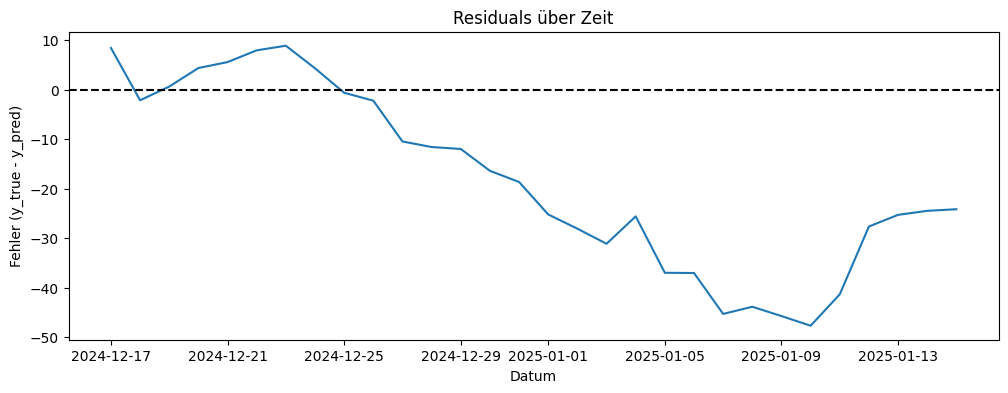

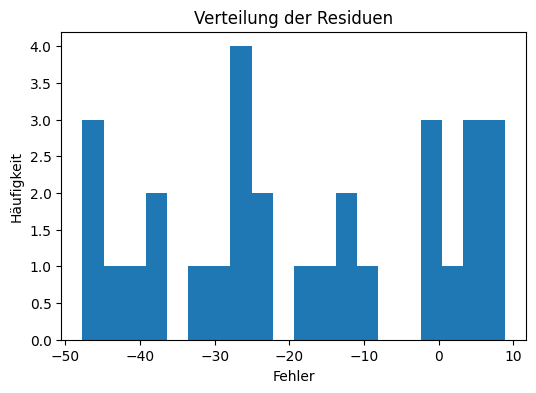

In [53]:
# Residuen berechnen
errors = y_true - y_pred

# Zeitreihen-Plot der Fehler
date_index = t  # aus Visualisierung
plt.figure(figsize=(12,4))
plt.plot(date_index, errors)
plt.axhline(0, color='k', linestyle='--')
plt.title('Residuals über Zeit')
plt.xlabel('Datum')
plt.ylabel('Fehler (y_true - y_pred)')
plt.show()

# Histogramm der Residuen
plt.figure(figsize=(6,4))
plt.hist(errors, bins=20)
plt.title('Verteilung der Residuen')
plt.xlabel('Fehler')
plt.ylabel('Häufigkeit')
plt.show()

# 9.2 Feature-Skalierung

In [54]:
from sklearn.preprocessing import StandardScaler
# Skalieren aller feat_dynamic_real
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train_feat_df)
scaled_test  = scaler.transform(test_feat_df)
# Ersetze feat_dynamic_real durch scaled_* und wiederhole Training & Forecast


# 9.3 Hyperparameter-Justierung

Lernrate (learning_rate): ggf. kleinere Werte wie 1e-4 testen

Epochen (epochs): Erhöhung auf 50–100

Zellanzahl (num_cells): Reduzieren oder Erhöhen (z.B. 32, 128)

Anzahl Layer (num_layers): Variieren zwischen 1–4

Nutze dazu Optuna- oder Grid-Search-Logik auf diesen Parametern.

# 10. Neustart: Modell mit optimalen Hyperparametern und skalierten Features

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1) Features skalieren
scaler = StandardScaler()
train_feat_scaled = scaler.fit_transform(train_feat_df)
test_feat_scaled  = scaler.transform(test_feat_df)
# Transponieren
feat_train_scaled = train_feat_scaled.T.astype(float)
feat_test_scaled  = test_feat_scaled.T.astype(float)

In [ ]:
# 2) Datasets neu erstellen
def make_scaled_dataset(series, feats, start):
    return ListDataset([
        {'start': pd.Timestamp(start),
         'target': series.values.astype(float),
         'feat_dynamic_real': feats}
    ], freq='D')

train_ds_scaled = make_scaled_dataset(train_series, feat_train_scaled, train_series.index[0])
test_ds_scaled  = make_scaled_dataset(test_series,  feat_test_scaled,  test_series.index[0])

In [ ]:


# 3) Estimator mit besten Optuna-Parametern erstellen
best_params = study.best_params
trainer_best = Trainer(
    epochs=best_params['epochs'],
    learning_rate=best_params['learning_rate'],
    hybridize=True
)
est_best = DeepAREstimator(
    freq='D',
    prediction_length=horizon,
    trainer=trainer_best,
    num_layers=best_params['num_layers'],
    num_cells=best_params['num_cells'],
    cell_type='lstm'
)
predictor_best = est_best.train(training_data=train_ds_scaled)

In [ ]:

# 4) Forecast erstellen und auswerten
test_iter = predictor_best.predict(test_ds_scaled)
forecast_best = next(test_iter)
y_pred_best = np.array(forecast_best.mean)
rmse_best = mean_squared_error(test_series.values.astype(float), y_pred_best, squared=False)
mae_best  = mean_absolute_error(test_series.values.astype(float), y_pred_best)
print(f"Optimiertes Modell RMSE: {rmse_best:.2f}, MAE: {mae_best:.2f}")

100%|██████████| 50/50 [01:33<00:00,  1.87s/it, epoch=43/43, avg_epoch_loss=1.85]


Optimiertes Modell RMSE: 30.02, MAE: 29.03


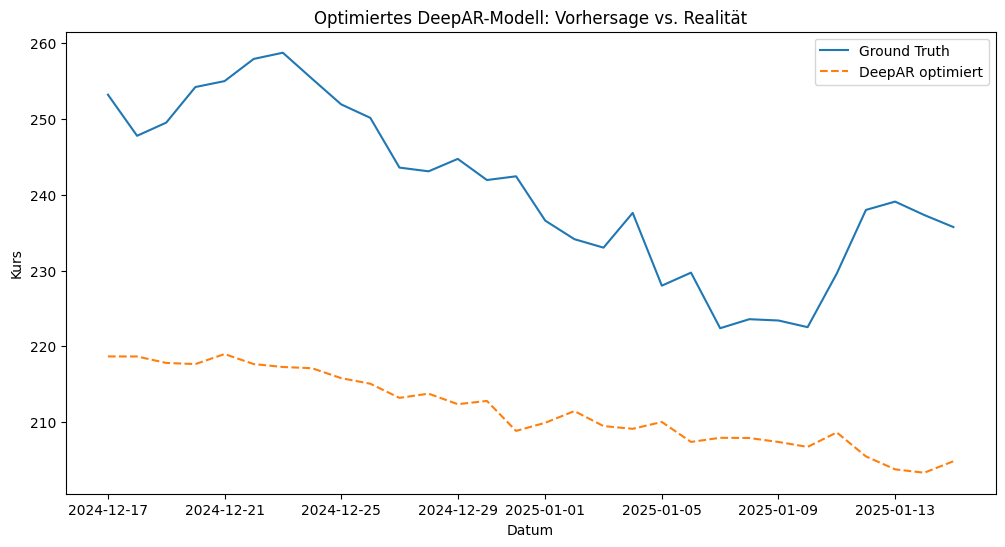

In [ ]:
# 5) Visualisierung optimiertes Modell
dates = pd.date_range(start=test_series.index[0], periods=horizon, freq='D')
plt.figure(figsize=(12,6))
plt.plot(dates, test_series.values.astype(float), label='Ground Truth')
plt.plot(dates, y_pred_best, '--', label='DeepAR optimiert')
plt.title('Optimiertes DeepAR-Modell: Vorhersage vs. Realität')
plt.xlabel('Datum')
plt.ylabel('Kurs')
plt.legend()
plt.show()

# 12.1 GluonTS DeepState (DSS)

In [ ]:

pip install gluonts

Note: you may need to restart the kernel to use updated packages.


# 12. LSTM mit Keras

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def build_keras_lstm(input_shape):
    model = Sequential([
        LSTM(50, input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

2025-05-04 20:42:57.631086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-04 20:42:57.631320: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-04 20:42:57.730023: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-04 20:43:00.456257: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:


# Prepare data: sliding window
def create_sequences(series, features, seq_len=30):
    X, y = [], []
    for i in range(len(series) - seq_len):
        X.append(features[i:i+seq_len].T)
        y.append(series.values[i+seq_len])
    return np.stack(X), np.array(y)

X_train, y_train = create_sequences(train_series, train_feat_df)


X_test, y_test   = create_sequences(test_series, test_feat_df)

NameError: name 'create_sequences' is not defined

In [ ]:




keras_model = build_keras_lstm(input_shape=(X_train.shape[1], X_train.shape[2]))
keras_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

y_pred_keras = keras_model.predict(X_test)
rmse_keras = np.sqrt(np.mean((y_test - y_pred_keras.squeeze())**2))
print(f"Keras LSTM RMSE: {rmse_keras:.2f}")

ValueError: need at least one array to stack